In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf

In [20]:
import pandas
import os

# This query represents dataset "Fitbit Data" for domain "fitbit_activity" and was generated for All of Us Controlled Tier Dataset v7
dataset_18186082_fitbit_activity_sql = """
    SELECT
        activity_summary.person_id,
        activity_summary.date,
        activity_summary.activity_calories,
        activity_summary.calories_out,
        activity_summary.fairly_active_minutes,
        activity_summary.lightly_active_minutes,
        activity_summary.sedentary_minutes,
        activity_summary.steps,
        activity_summary.very_active_minutes 
    FROM
        `""" + os.environ["WORKSPACE_CDR"] + """.activity_summary` activity_summary   
    WHERE
        activity_summary.PERSON_ID IN (SELECT
            distinct person_id  
        FROM
            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
        WHERE
            cb_search_person.person_id IN (SELECT
                person_id 
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
            WHERE
                has_fitbit = 1 ) 
            AND cb_search_person.person_id IN (SELECT
                person_id 
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
            WHERE
                has_fitbit_activity_summary = 1 ) 
            AND cb_search_person.person_id IN (SELECT
                person_id 
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
            WHERE
                has_fitbit_heart_rate_summary = 1 ) 
            AND cb_search_person.person_id IN (SELECT
                person_id 
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
            WHERE
                has_fitbit_heart_rate_level = 1 ) 
            AND cb_search_person.person_id IN (SELECT
                person_id 
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
            WHERE
                has_fitbit_steps_intraday = 1 ) 
            AND cb_search_person.person_id IN (SELECT
                person_id 
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
            WHERE
                has_fitbit_sleep_daily_summary = 1 ) 
            AND cb_search_person.person_id IN (SELECT
                person_id 
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
            WHERE
                has_fitbit_sleep_level = 1 ) )
    AND
        activity_summary.date BETWEEN '2020-01-01' AND '2020-07-01'"""

dataset_18186082_fitbit_activity_df = pandas.read_gbq(
    dataset_18186082_fitbit_activity_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

dataset_18186082_fitbit_activity_df.head(5)

Downloading:   0%|          |

,person_id,date,activity_calories,calories_out,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,steps,very_active_minutes
0,1653707,2020-05-28,717.0,3280.0,99.0,0.0,834.0,11850,0.0
1,1984896,2020-02-06,291.0,1735.0,78.0,0.0,1362.0,9295,0.0
2,1725445,2020-03-30,361.0,2082.0,60.0,0.0,1380.0,0,0.0
3,1984896,2020-01-10,339.0,1768.0,91.0,0.0,979.0,10894,0.0
4,4966907,2020-05-02,264.0,1756.0,60.0,0.0,1380.0,0,0.0


In [21]:
import pandas
import os

# This query represents dataset "Fitbit Data" for domain "fitbit_sleep_daily_summary" and was generated for All of Us Controlled Tier Dataset v7
dataset_18186082_fitbit_sleep_daily_summary_sql = """
    SELECT
        sleep_daily_summary.person_id,
        sleep_daily_summary.sleep_date,
        sleep_daily_summary.is_main_sleep,
        sleep_daily_summary.minute_in_bed,
        sleep_daily_summary.minute_asleep,
        sleep_daily_summary.minute_after_wakeup,
        sleep_daily_summary.minute_awake,
        sleep_daily_summary.minute_restless,
        sleep_daily_summary.minute_deep,
        sleep_daily_summary.minute_light,
        sleep_daily_summary.minute_rem,
        sleep_daily_summary.minute_wake 
    FROM
        `""" + os.environ["WORKSPACE_CDR"] + """.sleep_daily_summary` sleep_daily_summary   
    WHERE
        PERSON_ID IN (SELECT
            distinct person_id  
        FROM
            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
        WHERE
            cb_search_person.person_id IN (SELECT
                person_id 
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
            WHERE
                has_fitbit = 1 ) 
            AND cb_search_person.person_id IN (SELECT
                person_id 
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
            WHERE
                has_fitbit_activity_summary = 1 ) 
            AND cb_search_person.person_id IN (SELECT
                person_id 
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
            WHERE
                has_fitbit_heart_rate_summary = 1 ) 
            AND cb_search_person.person_id IN (SELECT
                person_id 
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
            WHERE
                has_fitbit_heart_rate_level = 1 ) 
            AND cb_search_person.person_id IN (SELECT
                person_id 
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
            WHERE
                has_fitbit_steps_intraday = 1 ) 
            AND cb_search_person.person_id IN (SELECT
                person_id 
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
            WHERE
                has_fitbit_sleep_daily_summary = 1 ) 
            AND cb_search_person.person_id IN (SELECT
                person_id 
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
            WHERE
                has_fitbit_sleep_level = 1 ) )
    AND
        sleep_date BETWEEN '2020-01-01' AND '2020-07-01'
        AND LOWER(is_main_sleep) = 'true'"""

dataset_18186082_fitbit_sleep_daily_summary_df = pandas.read_gbq(
    dataset_18186082_fitbit_sleep_daily_summary_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

dataset_18186082_fitbit_sleep_daily_summary_df.head(5)

Downloading:   0%|          |

,person_id,sleep_date,is_main_sleep,minute_in_bed,minute_asleep,minute_after_wakeup,minute_awake,minute_restless,minute_deep,minute_light,minute_rem,minute_wake
0,8200489,2020-04-11,true,256,236,0,20,<NA>,42,111,83,20
1,9357117,2020-06-08,true,256,235,4,21,<NA>,47,143,45,21
2,2069001,2020-06-11,true,256,235,7,21,<NA>,13,153,69,21
3,1765649,2020-05-01,true,256,234,0,22,<NA>,30,204,0,22
4,3297623,2020-05-10,true,256,234,0,22,<NA>,43,186,5,22


In [22]:
import pandas
import os

# This query represents dataset "Fitbit Data" for domain "person" and was generated for All of Us Controlled Tier Dataset v7
dataset_24359431_person_sql = """
    SELECT
        person.person_id,
        person.gender_concept_id,
        p_gender_concept.concept_name as gender,
        person.birth_datetime as date_of_birth,
        person.race_concept_id,
        p_race_concept.concept_name as race,
        person.ethnicity_concept_id,
        p_ethnicity_concept.concept_name as ethnicity,
        person.sex_at_birth_concept_id,
        p_sex_at_birth_concept.concept_name as sex_at_birth 
    FROM
        `""" + os.environ["WORKSPACE_CDR"] + """.person` person 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_gender_concept 
            ON person.gender_concept_id = p_gender_concept.concept_id 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_race_concept 
            ON person.race_concept_id = p_race_concept.concept_id 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_ethnicity_concept 
            ON person.ethnicity_concept_id = p_ethnicity_concept.concept_id 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_sex_at_birth_concept 
            ON person.sex_at_birth_concept_id = p_sex_at_birth_concept.concept_id  
    WHERE
        person.PERSON_ID IN (SELECT
            distinct person_id  
        FROM
            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
        WHERE
            cb_search_person.person_id IN (SELECT
                person_id 
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
            WHERE
                has_fitbit = 1 ) 
            AND cb_search_person.person_id IN (SELECT
                person_id 
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
            WHERE
                has_fitbit_activity_summary = 1 ) 
            AND cb_search_person.person_id IN (SELECT
                person_id 
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
            WHERE
                has_fitbit_heart_rate_summary = 1 ) 
            AND cb_search_person.person_id IN (SELECT
                person_id 
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
            WHERE
                has_fitbit_heart_rate_level = 1 ) 
            AND cb_search_person.person_id IN (SELECT
                person_id 
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
            WHERE
                has_fitbit_steps_intraday = 1 ) 
            AND cb_search_person.person_id IN (SELECT
                person_id 
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
            WHERE
                has_fitbit_sleep_daily_summary = 1 ) 
            AND cb_search_person.person_id IN (SELECT
                person_id 
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
            WHERE
                has_fitbit_sleep_level = 1 ) )"""

dataset_24359431_person_df = pandas.read_gbq(
    dataset_24359431_person_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

dataset_24359431_person_df.head(5)

Downloading:   0%|          |

,person_id,gender_concept_id,gender,date_of_birth,race_concept_id,race,ethnicity_concept_id,ethnicity,sex_at_birth_concept_id,sex_at_birth
0,1166759,2000000002,"Not man only, not woman only, prefer not to an...",1976-06-15 00:00:00+00:00,8527,White,38003564,Not Hispanic or Latino,1177221,I prefer not to answer
1,2323228,2000000002,"Not man only, not woman only, prefer not to an...",1974-06-15 00:00:00+00:00,8527,White,38003564,Not Hispanic or Latino,1177221,I prefer not to answer
2,2733734,45880669,Male,1947-06-15 00:00:00+00:00,8527,White,38003564,Not Hispanic or Latino,1177221,I prefer not to answer
3,1201360,45878463,Female,1971-06-15 00:00:00+00:00,2000000008,More than one population,38003564,Not Hispanic or Latino,4124462,None
4,1246866,45880669,Male,1993-06-15 00:00:00+00:00,8527,White,38003564,Not Hispanic or Latino,4124462,None


In [23]:
import pandas
import os

# This query represents dataset "Fitbit Data" for domain "zip_code_socioeconomic" and was generated for All of Us Controlled Tier Dataset v7
dataset_24359431_zip_code_socioeconomic_sql = """
    SELECT
        observation.person_id,
        observation.observation_datetime,
        zip_code.zip3_as_string as zip_code,
        zip_code.fraction_assisted_income as assisted_income,
        zip_code.fraction_high_school_edu as high_school_education,
        zip_code.median_income,
        zip_code.fraction_no_health_ins as no_health_insurance,
        zip_code.fraction_poverty as poverty,
        zip_code.fraction_vacant_housing as vacant_housing,
        zip_code.deprivation_index,
        zip_code.acs as american_community_survey_year 
    FROM
        `""" + os.environ["WORKSPACE_CDR"] + """.zip3_ses_map` zip_code 
    JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.observation` observation 
            ON CAST(SUBSTR(observation.value_as_string, 0, STRPOS(observation.value_as_string, '*') - 1) AS INT64) = zip_code.zip3  
    WHERE
        observation.PERSON_ID IN (SELECT
            distinct person_id  
        FROM
            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
        WHERE
            cb_search_person.person_id IN (SELECT
                person_id 
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
            WHERE
                has_fitbit = 1 ) 
            AND cb_search_person.person_id IN (SELECT
                person_id 
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
            WHERE
                has_fitbit_activity_summary = 1 ) 
            AND cb_search_person.person_id IN (SELECT
                person_id 
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
            WHERE
                has_fitbit_heart_rate_summary = 1 ) 
            AND cb_search_person.person_id IN (SELECT
                person_id 
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
            WHERE
                has_fitbit_heart_rate_level = 1 ) 
            AND cb_search_person.person_id IN (SELECT
                person_id 
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
            WHERE
                has_fitbit_steps_intraday = 1 ) 
            AND cb_search_person.person_id IN (SELECT
                person_id 
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
            WHERE
                has_fitbit_sleep_daily_summary = 1 ) 
            AND cb_search_person.person_id IN (SELECT
                person_id 
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` p 
            WHERE
                has_fitbit_sleep_level = 1 ) ) 
        AND observation_source_concept_id = 1585250 
        AND observation.value_as_string NOT LIKE 'Res%'"""

dataset_24359431_zip_code_socioeconomic_df = pandas.read_gbq(
    dataset_24359431_zip_code_socioeconomic_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

dataset_24359431_zip_code_socioeconomic_df.head(5)

Downloading:   0%|          |

,person_id,observation_datetime,zip_code,assisted_income,high_school_education,median_income,no_health_insurance,poverty,vacant_housing,deprivation_index,american_community_survey_year
0,2035288,2020-01-13 18:59:34+00:00,156**,11.191867,93.362068,59972.787795,4.250411,9.899459,9.373849,0.269983,2017
1,8658678,2021-08-03 02:14:37+00:00,165**,19.590654,90.012905,48248.901158,6.461257,18.733657,8.482196,0.339742,2017
2,2622162,2018-05-06 22:02:05+00:00,210**,7.245266,93.457311,100145.843432,4.660709,6.285863,5.263713,0.208726,2017
3,1215516,2018-09-05 17:52:17+00:00,330**,23.052760,83.564338,55069.234720,19.736695,17.495012,11.693634,0.404972,2017
4,9605302,2021-10-07 23:31:50+00:00,351**,12.055270,85.057956,55317.038809,9.184088,13.408754,12.737620,0.328812,2017


In [25]:
df = pd.merge(dataset_18186082_fitbit_activity_df, dataset_18186082_fitbit_sleep_daily_summary_df, 
              left_on=['person_id', 'date'], right_on=['person_id', 'sleep_date'])

In [28]:
combined_df = pd.merge(df, dataset_24359431_person_df, on='person_id', how='inner')

In [30]:
combined_df_final = pd.merge(combined_df, dataset_24359431_zip_code_socioeconomic_df, on='person_id', how='inner')

In [32]:
final_df = combined_df_final.copy()

In [35]:
final_df.drop(['assisted_income','high_school_education','vacant_housing','observation_datetime','no_health_insurance','assisted_income','person_id','american_community_survey_year'], axis=1, inplace=True)

In [38]:
final_df.drop(['sex_at_birth_concept_id','race_concept_id','ethnicity_concept_id','date_of_birth','gender_concept_id'], axis=1, inplace=True)

In [39]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154209 entries, 0 to 1154208
Data columns (total 27 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   date                    1154209 non-null  dbdate 
 1   activity_calories       1154209 non-null  float64
 2   calories_out            1154209 non-null  float64
 3   fairly_active_minutes   1154209 non-null  float64
 4   lightly_active_minutes  1154209 non-null  float64
 5   sedentary_minutes       1154209 non-null  float64
 6   steps                   1154209 non-null  Int64  
 7   very_active_minutes     1154209 non-null  float64
 8   sleep_date              1154209 non-null  dbdate 
 9   is_main_sleep           1154209 non-null  object 
 10  minute_in_bed           1154209 non-null  Int64  
 11  minute_asleep           1154209 non-null  Int64  
 12  minute_after_wakeup     1154209 non-null  Int64  
 13  minute_awake            1154209 non-null  Int64  
 14  mi

In [41]:
import pandas as pd
from sklearn.impute import KNNImputer
from multiprocessing import Pool
from sklearn.preprocessing import StandardScaler

In [46]:
df_sample = final_df.sample(frac=0.14, random_state=42)

In [47]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161589 entries, 1122531 to 370910
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   date                    161589 non-null  dbdate 
 1   activity_calories       161589 non-null  float64
 2   calories_out            161589 non-null  float64
 3   fairly_active_minutes   161589 non-null  float64
 4   lightly_active_minutes  161589 non-null  float64
 5   sedentary_minutes       161589 non-null  float64
 6   steps                   161589 non-null  Int64  
 7   very_active_minutes     161589 non-null  float64
 8   sleep_date              161589 non-null  dbdate 
 9   is_main_sleep           161589 non-null  object 
 10  minute_in_bed           161589 non-null  Int64  
 11  minute_asleep           161589 non-null  Int64  
 12  minute_after_wakeup     161589 non-null  Int64  
 13  minute_awake            161589 non-null  Int64  
 14  minute_restless    

In [48]:
# Initialize the scaler and imputer
scaler = StandardScaler()
imputer = KNNImputer(n_neighbors=5)

In [49]:
# Scale the 'minute_restless' column
scaled_data = scaler.fit_transform(df_sample[['minute_restless']])

In [50]:
# Apply KNN imputation on the scaled data
imputed_data = imputer.fit_transform(scaled_data)

In [51]:
# Inverse transform to get back to original scale
df_sample['minute_restless'] = scaler.inverse_transform(imputed_data)

In [52]:
# Display the updated DataFrame
print(df_sample['minute_restless'].isnull().sum()) 

0


In [53]:
# Define the columns to scale and impute
columns_to_scale_and_impute = ['minute_deep', 'minute_light', 'minute_rem', 'minute_wake']

# Initialize the scaler and the imputer
scaler = StandardScaler()
imputer = KNNImputer(n_neighbors=5)

# Scale the selected columns
scaled_data = scaler.fit_transform(df_sample[columns_to_scale_and_impute])

In [54]:
imputed_data = imputer.fit_transform(scaled_data)

In [55]:
# Inverse transform to get back to the original scale
imputed_data_inverse = scaler.inverse_transform(imputed_data)

# Replace the original columns with the imputed values
df_sample[columns_to_scale_and_impute] = imputed_data_inverse

# Check the result
df_sample[columns_to_scale_and_impute].head()

,minute_deep,minute_light,minute_rem,minute_wake
1122531,61.534616,261.484423,83.568316,57.978065
110897,54.000000,349.000000,94.000000,116.000000
164208,47.000000,244.000000,124.000000,61.000000
1022410,55.000000,322.000000,61.000000,54.000000
199668,59.000000,312.000000,28.000000,71.000000


In [57]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161589 entries, 1122531 to 370910
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   date                    161589 non-null  dbdate 
 1   activity_calories       161589 non-null  float64
 2   calories_out            161589 non-null  float64
 3   fairly_active_minutes   161589 non-null  float64
 4   lightly_active_minutes  161589 non-null  float64
 5   sedentary_minutes       161589 non-null  float64
 6   steps                   161589 non-null  Int64  
 7   very_active_minutes     161589 non-null  float64
 8   sleep_date              161589 non-null  dbdate 
 9   is_main_sleep           161589 non-null  object 
 10  minute_in_bed           161589 non-null  Int64  
 11  minute_asleep           161589 non-null  Int64  
 12  minute_after_wakeup     161589 non-null  Int64  
 13  minute_awake            161589 non-null  Int64  
 14  minute_restless    

 # -----------

In [58]:


df_sample['date'] = pd.to_datetime(df_sample['date'])


In [66]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161589 entries, 1122531 to 370910
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   date                    161589 non-null  datetime64[ns]
 1   activity_calories       161589 non-null  float64       
 2   calories_out            161589 non-null  float64       
 3   fairly_active_minutes   161589 non-null  float64       
 4   lightly_active_minutes  161589 non-null  float64       
 5   sedentary_minutes       161589 non-null  float64       
 6   steps                   161589 non-null  Int64         
 7   very_active_minutes     161589 non-null  float64       
 8   sleep_date              161589 non-null  dbdate        
 9   is_main_sleep           161589 non-null  object        
 10  minute_in_bed           161589 non-null  Int64         
 11  minute_asleep           161589 non-null  Int64         
 12  minute_after_wakeup     16158

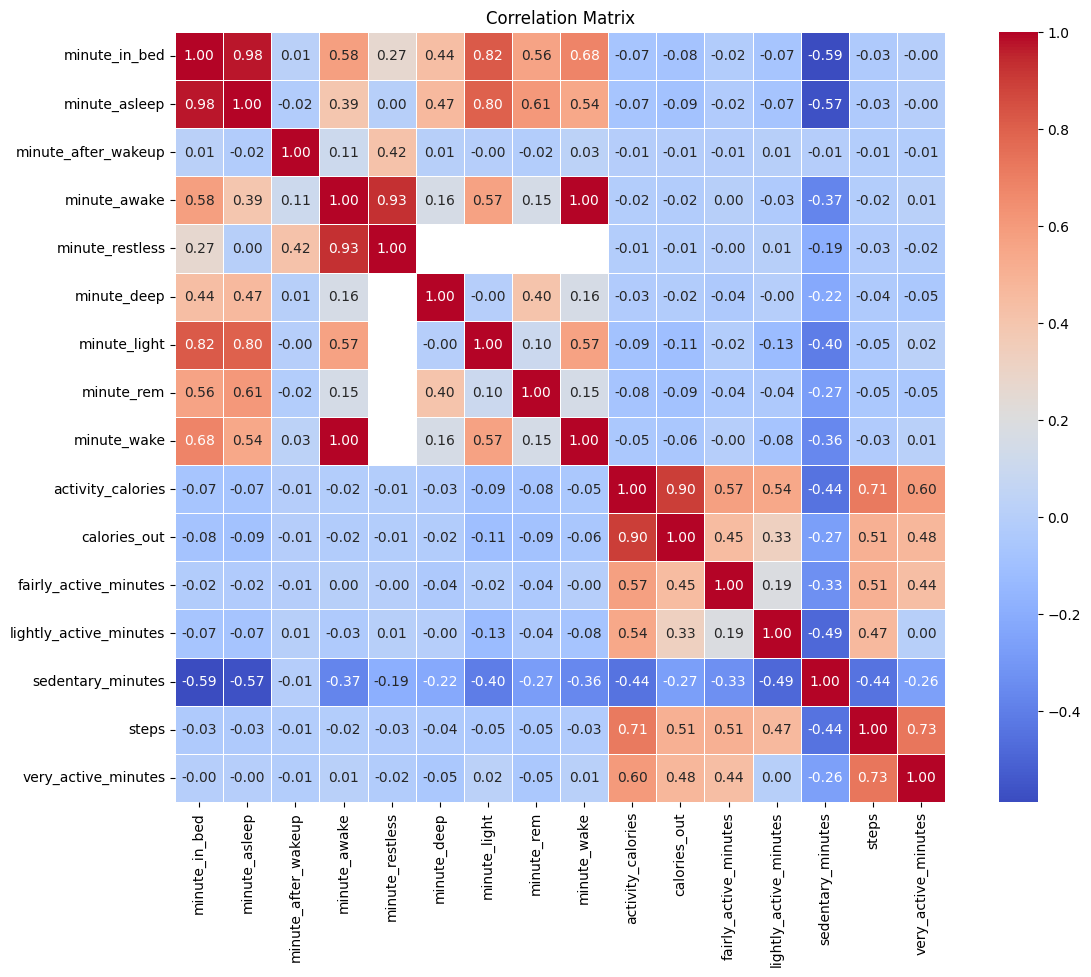

In [60]:
columns_of_interest = [
    'minute_in_bed',
    'minute_asleep',
    'minute_after_wakeup',
    'minute_awake',
    'minute_restless',
    'minute_deep',
    'minute_light',
    'minute_rem',
    'minute_wake',
    'activity_calories',
    'calories_out',
    'fairly_active_minutes',
    'lightly_active_minutes',
    'sedentary_minutes',
    'steps',
    'very_active_minutes'
]

# Calculate the correlation matrix
correlation_matrix = df_copy[columns_of_interest].corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

# Show the plot
plt.title('Correlation Matrix')
plt.show()

In [274]:
sleep_data = {
    'Deep Sleep': df_copy['minute_deep'].sum(),
    'Light Sleep': df_copy['minute_light'].sum(),
    'REM Sleep': df_copy['minute_rem'].sum()
}

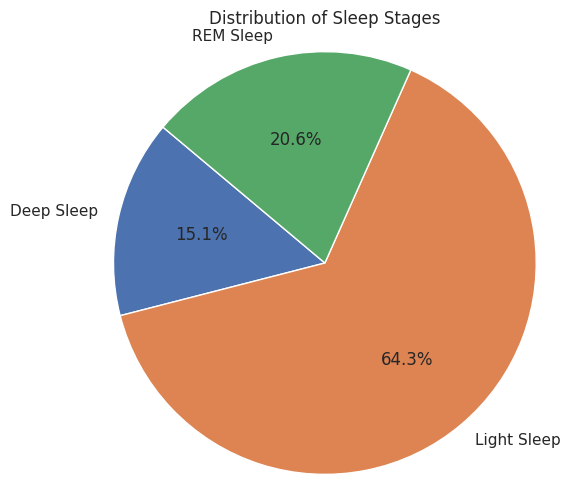

In [276]:
# Create a DataFrame for plotting
sleep_df = pd.DataFrame(list(sleep_data.items()), columns=['Sleep Stage', 'Minutes'])

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sleep_df['Minutes'], labels=sleep_df['Sleep Stage'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sleep Stages')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

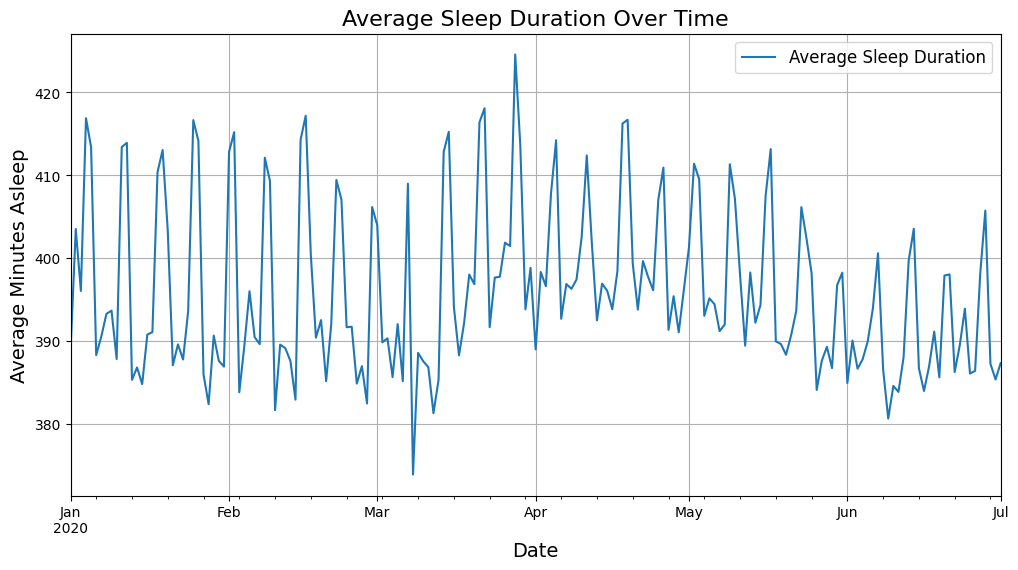

In [61]:

plt.figure(figsize=(12, 6))  # You can adjust the width and height

# Group by date and plot the mean minute_asleep
df_sample.groupby('date')['minute_asleep'].mean().plot()

# Add titles and labels
plt.title('Average Sleep Duration Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Minutes Asleep', fontsize=14)

# Add grid for better readability
plt.grid(True)

# Optionally, you can add a legend if you're plotting multiple series
plt.legend(['Average Sleep Duration'], fontsize=12)

# Show the plot
plt.show()

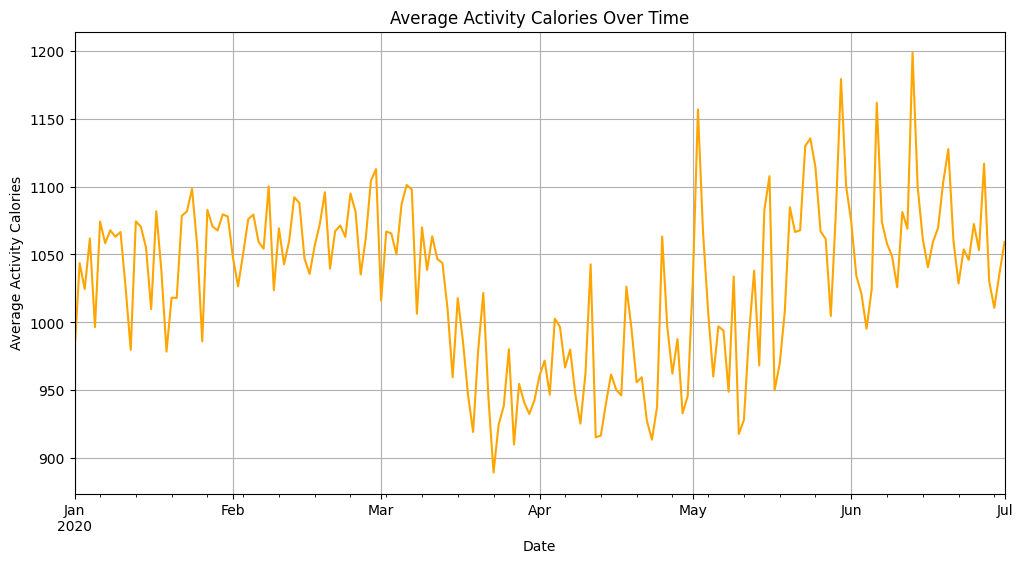

In [62]:
# Time Series Analysis of Average Activity Calories Over Time
plt.figure(figsize=(12, 6))
df_sample.groupby('date')['activity_calories'].mean().plot(color='orange')
plt.title('Average Activity Calories Over Time')
plt.xlabel('Date')
plt.ylabel('Average Activity Calories')
plt.grid()
plt.show()

In [82]:
### Sleep quality score 


df_sample['sleep_quality_score'] = (
    df_sample['minute_asleep'] - df_sample['minute_awake'] + 
    df_sample['minute_deep'] + df_sample['minute_light'] + 
    df_sample['minute_rem'] - df_sample['minute_restless']
).astype(int)

In [83]:
df_sample.head(5)

,date,activity_calories,calories_out,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,steps,very_active_minutes,sleep_date,is_main_sleep,...,minute_wake,gender,race,ethnicity,sex_at_birth,zip_code,median_income,poverty,deprivation_index,sleep_quality_score
1122531,2020-01-27,471.0,1796.0,10.0,137.0,647.0,3204,0.0,2020-01-27,true,...,57.978065,Female,White,Not Hispanic or Latino,Female,983**,70011.060581,10.296764,0.272847,286
110897,2020-03-30,1639.0,2912.0,3.0,139.0,464.0,19813,127.0,2020-03-30,true,...,116.000000,Male,White,Not Hispanic or Latino,Male,321**,47040.262830,16.360952,0.357995,851
164208,2020-04-15,1352.0,2452.0,29.0,292.0,600.0,15053,43.0,2020-04-15,true,...,61.000000,Female,White,Not Hispanic or Latino,Female,535**,67800.836267,9.288646,0.261993,742
1022410,2020-05-20,910.0,2732.0,0.0,221.0,727.0,3813,0.0,2020-05-20,true,...,54.000000,Male,White,Not Hispanic or Latino,Male,334**,63234.475789,13.684153,0.342149,795
199668,2020-06-03,1087.0,2672.0,6.0,220.0,727.0,5506,17.0,2020-06-03,true,...,71.000000,Male,White,Not Hispanic or Latino,Male,770**,59615.447792,19.605655,0.417444,700


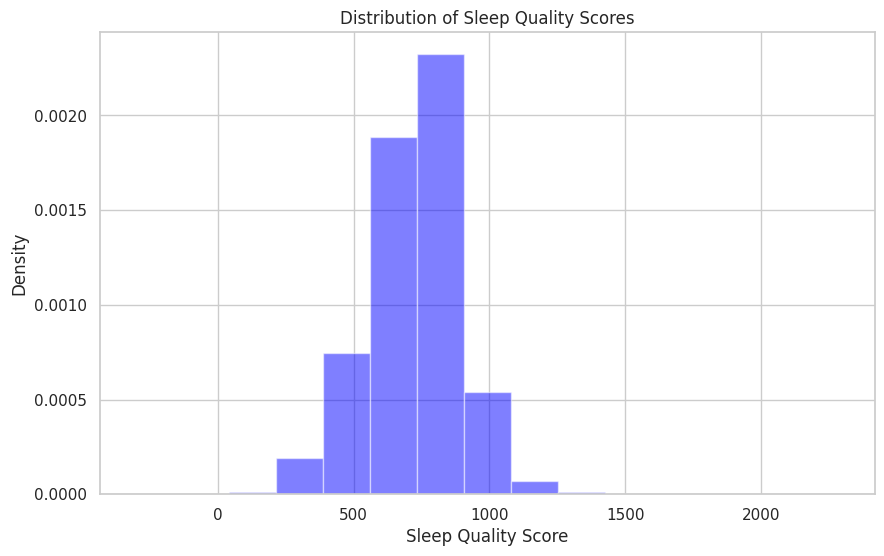

In [77]:
plt.figure(figsize=(10, 6))
plt.hist(df_sample['sleep_quality_score'], bins=15, density=True, alpha=0.5, color='blue')
plt.title('Distribution of Sleep Quality Scores')
plt.xlabel('Sleep Quality Score')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [84]:
active_weight = 1  # Weight for active minutes
sedentary_penalty = -1  # Penalty for sedentary minutes

# Calculate the sleep quality score with activity components
df_sample['sleep_quality_score_1'] = (
    (df_sample['minute_asleep'] - df_sample['minute_awake'] +
     df_sample['minute_deep'] + df_sample['minute_light'] +
     df_sample['minute_rem'] - df_sample['minute_restless']) +
    (active_weight * (df_sample['fairly_active_minutes'] + df_sample['very_active_minutes'])) +
    (sedentary_penalty * df_sample['sedentary_minutes'])
).astype(int)

In [85]:
df_sample.head(5)

,date,activity_calories,calories_out,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,steps,very_active_minutes,sleep_date,is_main_sleep,...,gender,race,ethnicity,sex_at_birth,zip_code,median_income,poverty,deprivation_index,sleep_quality_score,sleep_quality_score_1
1122531,2020-01-27,471.0,1796.0,10.0,137.0,647.0,3204,0.0,2020-01-27,true,...,Female,White,Not Hispanic or Latino,Female,983**,70011.060581,10.296764,0.272847,286,-350
110897,2020-03-30,1639.0,2912.0,3.0,139.0,464.0,19813,127.0,2020-03-30,true,...,Male,White,Not Hispanic or Latino,Male,321**,47040.262830,16.360952,0.357995,851,517
164208,2020-04-15,1352.0,2452.0,29.0,292.0,600.0,15053,43.0,2020-04-15,true,...,Female,White,Not Hispanic or Latino,Female,535**,67800.836267,9.288646,0.261993,742,214
1022410,2020-05-20,910.0,2732.0,0.0,221.0,727.0,3813,0.0,2020-05-20,true,...,Male,White,Not Hispanic or Latino,Male,334**,63234.475789,13.684153,0.342149,795,68
199668,2020-06-03,1087.0,2672.0,6.0,220.0,727.0,5506,17.0,2020-06-03,true,...,Male,White,Not Hispanic or Latino,Male,770**,59615.447792,19.605655,0.417444,700,-3


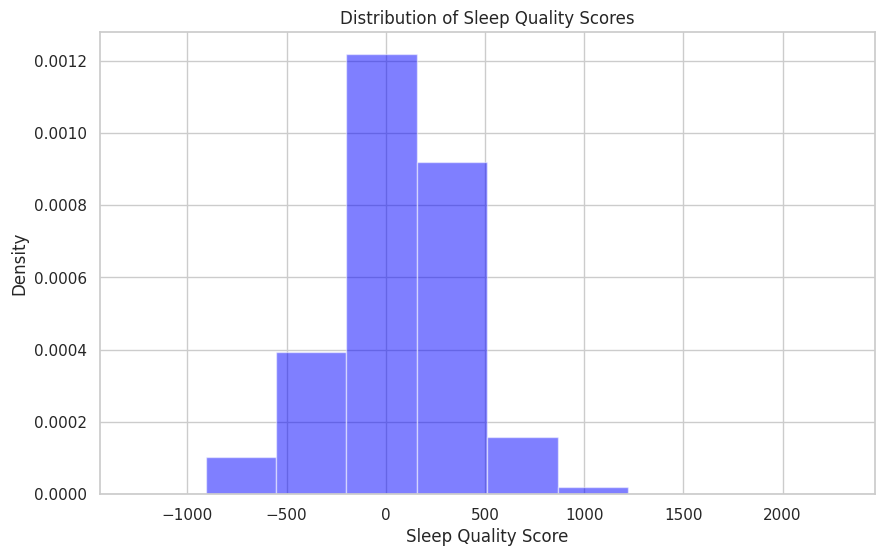

In [98]:
plt.figure(figsize=(10, 6))
plt.hist(df_sample['sleep_quality_score_1'], bins=10, density=True, alpha=0.5, color='blue')
plt.title('Distribution of Sleep Quality Scores')
plt.xlabel('Sleep Quality Score')
plt.ylabel('Density')
plt.grid(True)
plt.show()

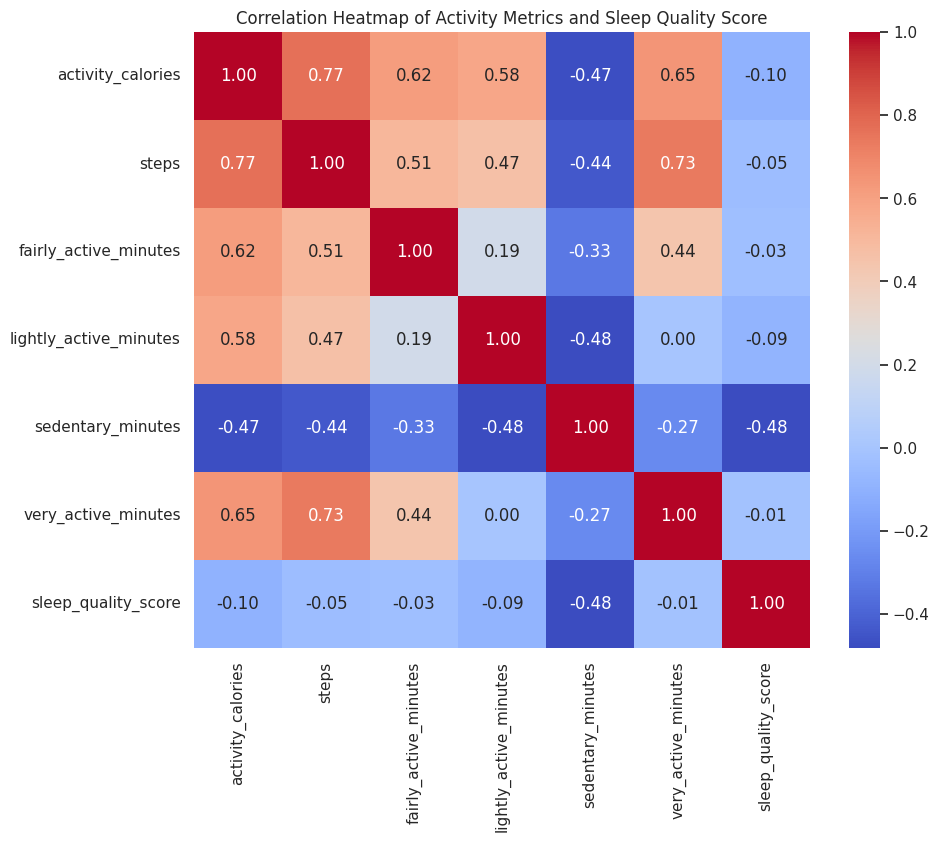

In [89]:
# Heatmap of Activity Metrics and Sleep Quality Score
activity_metrics = df_sample[['activity_calories', 'steps', 'fairly_active_minutes', 
                        'lightly_active_minutes', 'sedentary_minutes', 
                        'very_active_minutes', 'sleep_quality_score']]

plt.figure(figsize=(10, 8))
sns.heatmap(activity_metrics.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Activity Metrics and Sleep Quality Score')
plt.show()

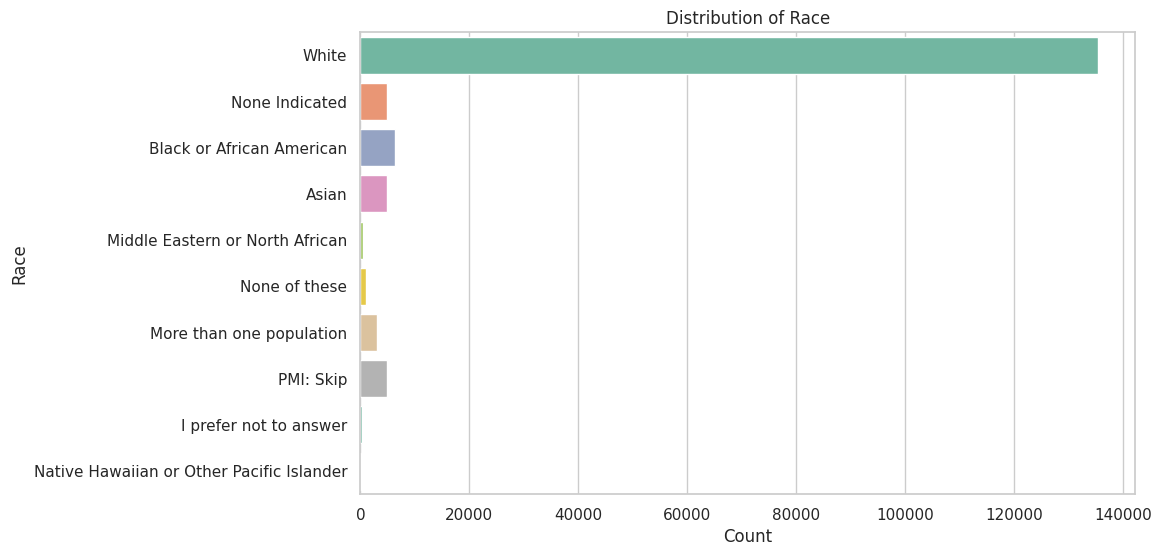

In [94]:
# Distribution of Race
plt.figure(figsize=(10, 6))
sns.countplot(y='race', data=df_sample, palette='Set2')
plt.title('Distribution of Race')
plt.xlabel('Count')
plt.ylabel('Race')
plt.show()

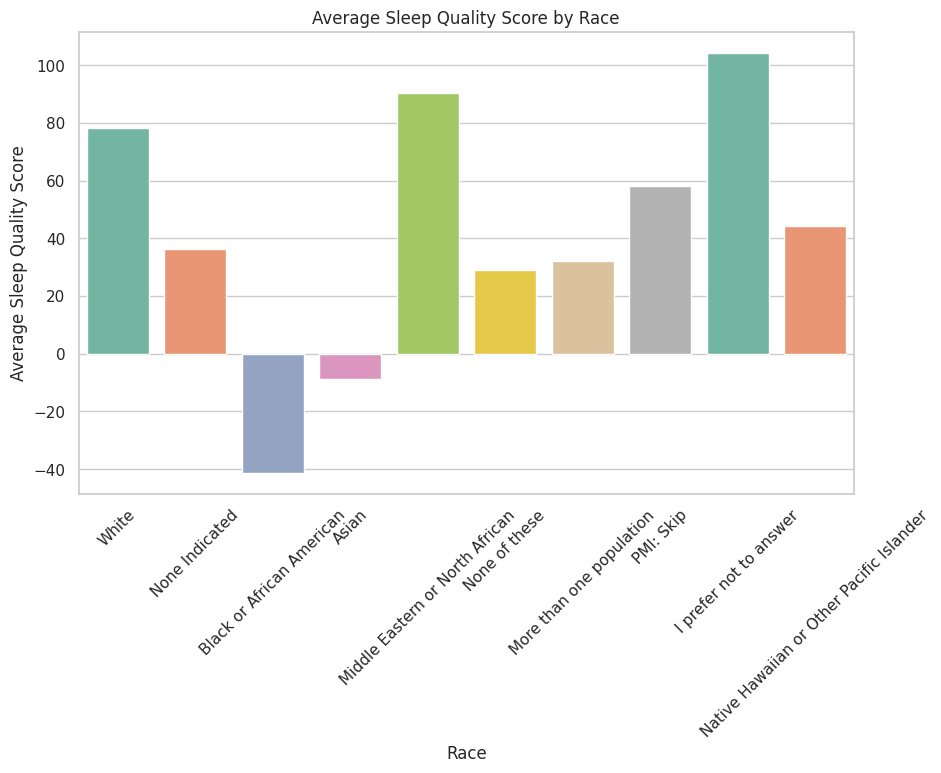

In [97]:
plt.figure(figsize=(10, 6))
sns.barplot(x='race', y='sleep_quality_score_1', data=df_sample, estimator=np.mean, ci=None, palette='Set2')
plt.title('Average Sleep Quality Score by Race')
plt.xlabel('Race')
plt.ylabel('Average Sleep Quality Score')
plt.xticks(rotation=45)
plt.show()

In [101]:
# Define weights
active_weight = 1  # Weight for active minutes
sedentary_penalty = -1  # Penalty for sedentary minutes
minute_in_bed_weight = 0.5  # Weight for minutes in bed

# Calculate the sleep quality score with activity components and minute_in_bed
df_sample['sleep_quality_score_3'] = (
    (df_sample['minute_asleep'] - df_sample['minute_awake'] +
     df_sample['minute_deep'] + df_sample['minute_light'] +
     df_sample['minute_rem'] - df_sample['minute_restless']) +
    (active_weight * (df_sample['fairly_active_minutes'] + df_sample['very_active_minutes'])) +
    (sedentary_penalty * df_sample['sedentary_minutes']) +
    (minute_in_bed_weight * df_sample['minute_in_bed'])  # Incorporate minute_in_bed
).astype(int)

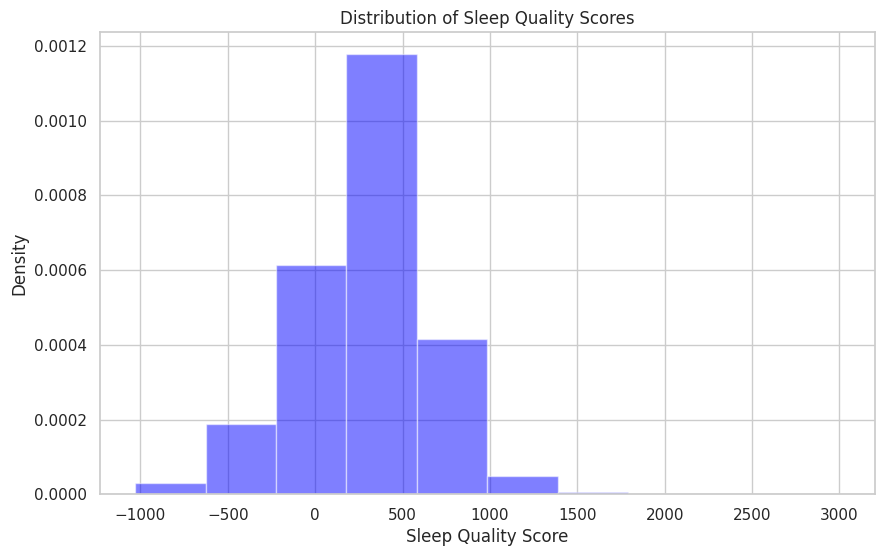

In [102]:
plt.figure(figsize=(10, 6))
plt.hist(df_sample['sleep_quality_score_3'], bins=10, density=True, alpha=0.5, color='blue')
plt.title('Distribution of Sleep Quality Scores')
plt.xlabel('Sleep Quality Score')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [109]:
df_sample.drop(columns=['sleep_quality_score_2','income_category'], inplace=True)

In [112]:
df_sample['zip_code'] = df_sample['zip_code'].str.slice(0, -2)

# -------------------------------------------------------------

# MODEL - 1

In [117]:
df_sample.head(5)

,date,activity_calories,calories_out,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,steps,very_active_minutes,sleep_date,is_main_sleep,...,race,ethnicity,sex_at_birth,zip_code,median_income,poverty,deprivation_index,sleep_quality_score,sleep_quality_score_1,sleep_quality_score_3
1122531,2020-01-27,471.0,1796.0,10.0,137.0,647.0,3204,0.0,2020-01-27,true,...,White,Not Hispanic or Latino,Female,983,70011.060581,10.296764,0.272847,286,-350,-11
110897,2020-03-30,1639.0,2912.0,3.0,139.0,464.0,19813,127.0,2020-03-30,true,...,White,Not Hispanic or Latino,Male,321,47040.262830,16.360952,0.357995,851,517,823
164208,2020-04-15,1352.0,2452.0,29.0,292.0,600.0,15053,43.0,2020-04-15,true,...,White,Not Hispanic or Latino,Female,535,67800.836267,9.288646,0.261993,742,214,452
1022410,2020-05-20,910.0,2732.0,0.0,221.0,727.0,3813,0.0,2020-05-20,true,...,White,Not Hispanic or Latino,Male,334,63234.475789,13.684153,0.342149,795,68,314
199668,2020-06-03,1087.0,2672.0,6.0,220.0,727.0,5506,17.0,2020-06-03,true,...,White,Not Hispanic or Latino,Male,770,59615.447792,19.605655,0.417444,700,-3,231


In [118]:
ml_df= df_sample.copy()

In [119]:
ml_df.drop(columns=['date','is_main_sleep','race','ethnicity','sex_at_birth','zip_code','sleep_quality_score_1','sleep_quality_score_3'], inplace=True)

In [121]:
ml_df.drop(columns=['sleep_date','gender'], inplace=True)


In [122]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161589 entries, 1122531 to 370910
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   activity_calories       161589 non-null  float64
 1   calories_out            161589 non-null  float64
 2   fairly_active_minutes   161589 non-null  float64
 3   lightly_active_minutes  161589 non-null  float64
 4   sedentary_minutes       161589 non-null  float64
 5   steps                   161589 non-null  Int64  
 6   very_active_minutes     161589 non-null  float64
 7   minute_in_bed           161589 non-null  Int64  
 8   minute_asleep           161589 non-null  Int64  
 9   minute_after_wakeup     161589 non-null  Int64  
 10  minute_awake            161589 non-null  Int64  
 11  minute_restless         161589 non-null  float64
 12  minute_deep             161589 non-null  float64
 13  minute_light            161589 non-null  float64
 14  minute_rem         

In [123]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [124]:
X = ml_df.drop(columns=['sleep_quality_score'])
y = ml_df['sleep_quality_score']

In [125]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
# Create a Random Forest model
model = RandomForestRegressor(random_state=42)

In [127]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

In [128]:
# Set up the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, 
                           verbose=2, n_jobs=-1)

In [129]:
# Fit the grid search
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.1min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  48.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.1min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 2.2min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [130]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [131]:
# Make predictions using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 48.52816035176174
R² Score: 0.9983040180002042
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=  22.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=  24.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 1.7min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  51.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.0min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=  13.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_esti

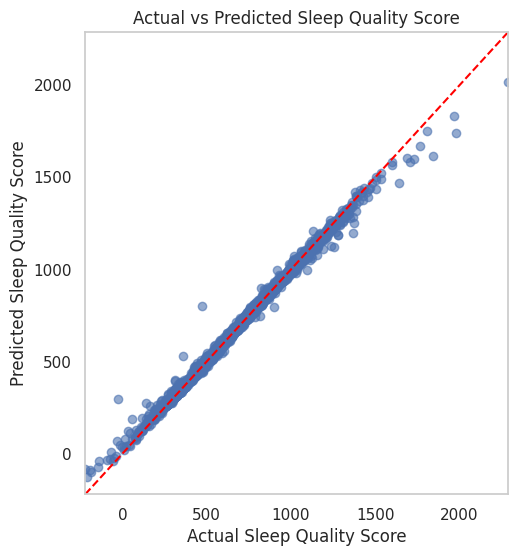

In [132]:
# Set the style of seaborn
sns.set(style='whitegrid')

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(12, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # 45-degree line
plt.title('Actual vs Predicted Sleep Quality Score')
plt.xlabel('Actual Sleep Quality Score')
plt.ylabel('Predicted Sleep Quality Score')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()

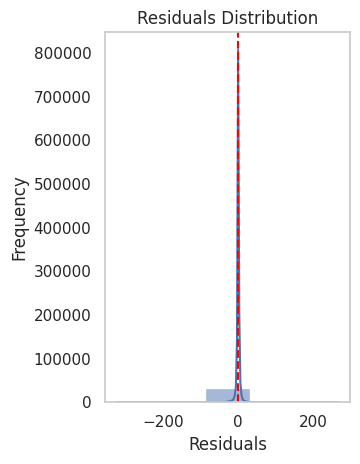

In [134]:
# Create a residual plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, bins=5, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--')  # Line at zero
plt.grid()

plt.tight_layout()
plt.show()

# MODEL - 2

In [138]:
ml_model_2 = df_sample.copy()

In [140]:
ml_model_2.drop(columns=['gender','sleep_date','date','is_main_sleep','race','ethnicity','sex_at_birth','zip_code','sleep_quality_score','sleep_quality_score_3'], inplace=True)

In [141]:
ml_model_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161589 entries, 1122531 to 370910
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   activity_calories       161589 non-null  float64
 1   calories_out            161589 non-null  float64
 2   fairly_active_minutes   161589 non-null  float64
 3   lightly_active_minutes  161589 non-null  float64
 4   sedentary_minutes       161589 non-null  float64
 5   steps                   161589 non-null  Int64  
 6   very_active_minutes     161589 non-null  float64
 7   minute_in_bed           161589 non-null  Int64  
 8   minute_asleep           161589 non-null  Int64  
 9   minute_after_wakeup     161589 non-null  Int64  
 10  minute_awake            161589 non-null  Int64  
 11  minute_restless         161589 non-null  float64
 12  minute_deep             161589 non-null  float64
 13  minute_light            161589 non-null  float64
 14  minute_rem         

In [136]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [144]:
# Create new features
ml_model_2['sleep_efficiency'] = ml_model_2['minute_asleep'] / ml_model_2['minute_in_bed']
ml_model_2['deep_sleep_ratio'] = df['minute_deep'] / ml_model_2['minute_asleep']
ml_model_2['rem_sleep_ratio'] = df['minute_rem'] / ml_model_2['minute_asleep']
ml_model_2['activity_ratio'] = (ml_model_2['fairly_active_minutes'] + ml_model_2['lightly_active_minutes'] + ml_model_2['very_active_minutes']) / ml_model_2['sedentary_minutes']

In [155]:
ml_model_2.head(5)

,activity_calories,calories_out,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,steps,very_active_minutes,minute_in_bed,minute_asleep,minute_after_wakeup,...,minute_deep,minute_light,minute_rem,minute_wake,median_income,poverty,deprivation_index,sleep_quality_score_1,sleep_efficiency,activity_ratio
1122531,471,1796,10,137,647,3204,0,677,398,28,...,61,261,83,57,70011,10,0,-350,0.587888,0.227202
110897,1639,2912,3,139,464,19813,127,613,497,0,...,54,349,94,116,47040,16,0,517,0.810767,0.579741
164208,1352,2452,29,292,600,15053,43,476,415,0,...,47,244,124,61,67800,9,0,214,0.871849,0.606667
1022410,910,2732,0,221,727,3813,0,492,438,0,...,55,322,61,54,63234,13,0,68,0.890244,0.303989
199668,1087,2672,6,220,727,5506,17,470,399,1,...,59,312,28,71,59615,19,0,-3,0.848936,0.334250


In [148]:
ml_model_2.drop(columns=['deep_sleep_ratio','rem_sleep_ratio'], inplace=True)

In [161]:
ml_model_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161589 entries, 1122531 to 370910
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   activity_calories       161589 non-null  int64
 1   calories_out            161589 non-null  int64
 2   fairly_active_minutes   161589 non-null  int64
 3   lightly_active_minutes  161589 non-null  int64
 4   sedentary_minutes       161589 non-null  int64
 5   steps                   161589 non-null  Int64
 6   very_active_minutes     161589 non-null  int64
 7   minute_in_bed           161589 non-null  Int64
 8   minute_asleep           161589 non-null  Int64
 9   minute_after_wakeup     161589 non-null  Int64
 10  minute_awake            161589 non-null  Int64
 11  minute_restless         161589 non-null  int64
 12  minute_deep             161589 non-null  int64
 13  minute_light            161589 non-null  int64
 14  minute_rem              161589 non-null  int64
 15 

In [156]:
ml_model_2['sleep_efficiency'] = ml_model_2['sleep_efficiency'].astype(int)

In [160]:
ml_model_2.drop(columns=['activity_ratio'], inplace=True)

In [164]:
X = ml_model_2.drop('sleep_quality_score_1', axis=1)
y = ml_model_2['sleep_quality_score_1']

In [165]:
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns)
top_features = mi_scores.nlargest(15).index.tolist()

X = X[top_features]

In [166]:
# Handle skewness and scale features
qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal')
X_transformed = pd.DataFrame(qt.fit_transform(X), columns=X.columns)


In [167]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)

In [168]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [169]:
# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=4, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [170]:
# XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=6, 
                             reg_alpha=0.1, reg_lambda=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [171]:
# Evaluate models
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("Random Forest R2:", r2_score(y_test, rf_pred))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, xgb_pred)))
print("XGBoost R2:", r2_score(y_test, xgb_pred))

Random Forest RMSE: 33.18355451573671
Random Forest R2: 0.9887586710585569
XGBoost RMSE: 19.908692023474313
XGBoost R2: 0.995953707219569


In [173]:
# Cross-validation for Model Robustness
from sklearn.model_selection import train_test_split, cross_val_score

rf_cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
xgb_cv_scores = cross_val_score(xgb_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

In [174]:
print("\nRandom Forest CV RMSE:", np.sqrt(-rf_cv_scores.mean()))
print("XGBoost CV RMSE:", np.sqrt(-xgb_cv_scores.mean()))


Random Forest CV RMSE: 32.843791938108915
XGBoost CV RMSE: 20.383822271218968


In [175]:
# Analyze Feature Importance

rf_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
rf_importance = rf_importance.sort_values('importance', ascending=False)
print("\nRandom Forest Top 10 Features:")
print(rf_importance.head(10))

xgb_importance = pd.DataFrame({'feature': X.columns, 'importance': xgb_model.feature_importances_})
xgb_importance = xgb_importance.sort_values('importance', ascending=False)
print("\nXGBoost Top 10 Features:")
print(xgb_importance.head(10))


Random Forest Top 10 Features:
                  feature  importance
0       sedentary_minutes    0.683030
1           minute_asleep    0.281933
12    very_active_minutes    0.015000
13        minute_restless    0.009480
10  fairly_active_minutes    0.004910
3            minute_light    0.001715
6            minute_awake    0.001519
2           minute_in_bed    0.000812
8                   steps    0.000533
9       activity_calories    0.000510

XGBoost Top 10 Features:
                  feature  importance
0       sedentary_minutes    0.700502
1           minute_asleep    0.183141
12    very_active_minutes    0.021963
10  fairly_active_minutes    0.019594
13        minute_restless    0.017967
8                   steps    0.013026
3            minute_light    0.009817
9       activity_calories    0.007758
6            minute_awake    0.007072
4              minute_rem    0.005537


# --------------------------------------

# Model- 4

In [176]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [190]:
ml_model_4 = df_sample.copy()

In [191]:
ml_model_4.head()

,date,activity_calories,calories_out,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,steps,very_active_minutes,sleep_date,is_main_sleep,...,race,ethnicity,sex_at_birth,zip_code,median_income,poverty,deprivation_index,sleep_quality_score,sleep_quality_score_1,sleep_quality_score_3
1122531,2020-01-27,471.0,1796.0,10.0,137.0,647.0,3204,0.0,2020-01-27,true,...,White,Not Hispanic or Latino,Female,983,70011.060581,10.296764,0.272847,286,-350,-11
110897,2020-03-30,1639.0,2912.0,3.0,139.0,464.0,19813,127.0,2020-03-30,true,...,White,Not Hispanic or Latino,Male,321,47040.262830,16.360952,0.357995,851,517,823
164208,2020-04-15,1352.0,2452.0,29.0,292.0,600.0,15053,43.0,2020-04-15,true,...,White,Not Hispanic or Latino,Female,535,67800.836267,9.288646,0.261993,742,214,452
1022410,2020-05-20,910.0,2732.0,0.0,221.0,727.0,3813,0.0,2020-05-20,true,...,White,Not Hispanic or Latino,Male,334,63234.475789,13.684153,0.342149,795,68,314
199668,2020-06-03,1087.0,2672.0,6.0,220.0,727.0,5506,17.0,2020-06-03,true,...,White,Not Hispanic or Latino,Male,770,59615.447792,19.605655,0.417444,700,-3,231


In [192]:
ml_model_4.drop(columns=['gender','sleep_date','date','is_main_sleep','race','ethnicity','sex_at_birth','zip_code','sleep_quality_score_1','sleep_quality_score_3'], inplace=True)

In [193]:
ml_model_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161589 entries, 1122531 to 370910
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   activity_calories       161589 non-null  float64
 1   calories_out            161589 non-null  float64
 2   fairly_active_minutes   161589 non-null  float64
 3   lightly_active_minutes  161589 non-null  float64
 4   sedentary_minutes       161589 non-null  float64
 5   steps                   161589 non-null  Int64  
 6   very_active_minutes     161589 non-null  float64
 7   minute_in_bed           161589 non-null  Int64  
 8   minute_asleep           161589 non-null  Int64  
 9   minute_after_wakeup     161589 non-null  Int64  
 10  minute_awake            161589 non-null  Int64  
 11  minute_restless         161589 non-null  float64
 12  minute_deep             161589 non-null  float64
 13  minute_light            161589 non-null  float64
 14  minute_rem         

In [194]:
# Load and prepare data
X = ml_model_4.drop('sleep_quality_score', axis=1)
y = ml_model_4['sleep_quality_score']

In [195]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [196]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [197]:
def create_neural_network(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

In [200]:
def train_and_evaluate_models():
    models = {
        'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=4, random_state=42),
        'XGBoost': xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=6, reg_alpha=0.1, reg_lambda=0.1, random_state=42),
        'Neural Network': create_neural_network(X_train.shape[1])
    }

    results = {}

    for name, model in models.items():
        print(f"\nTraining and evaluating {name}...")
        print(f"X_train shape: {X_train_scaled.shape}, y_train shape: {y_train.shape}")
        print(f"X_val shape: {X_val_scaled.shape}, y_val shape: {y_val.shape}")
        print(f"X_test shape: {X_test_scaled.shape}, y_test shape: {y_test.shape}")

        if name == 'Neural Network':
            early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
            model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), 
                      epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)
        else:
            model.fit(X_train_scaled, y_train)

        # Validation set performance
        y_val_pred = model.predict(X_val_scaled)
        if name == 'Neural Network':
            y_val_pred = y_val_pred.flatten()  # Flatten predictions for Neural Network
        val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
        val_r2 = r2_score(y_val, y_val_pred)
        print(f"Validation RMSE: {val_rmse:.4f}, R2: {val_r2:.4f}")

        # Cross-validation
        if name != 'Neural Network':
            cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
            cv_rmse = np.sqrt(-cv_scores)
            print(f"Cross-validation RMSE: {cv_rmse.mean():.4f} (+/- {cv_rmse.std() * 2:.4f})")

        # Feature importance (for tree-based models)
        if name in ['Random Forest', 'XGBoost']:
            feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
            feature_importance = feature_importance.sort_values('importance', ascending=False)
            plt.figure(figsize=(10, 6))
            sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
            plt.title(f'Top 20 Feature Importances - {name}')
            plt.tight_layout()
            plt.show()

        # Residual analysis
        plt.figure(figsize=(10, 6))
        plt.scatter(y_val_pred, y_val - y_val_pred)
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')
        plt.title(f'Residual Plot - {name}')
        plt.axhline(y=0, color='r', linestyle='--')
        plt.tight_layout()
        plt.show()

        # Test set performance
        y_test_pred = model.predict(X_test_scaled)
        if name == 'Neural Network':
            y_test_pred = y_test_pred.flatten()  # Flatten predictions for Neural Network
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_r2 = r2_score(y_test, y_test_pred)
        print(f"Test RMSE: {test_rmse:.4f}, R2: {test_r2:.4f}")

        results[name] = {'val_rmse': val_rmse, 'val_r2': val_r2, 'test_rmse': test_rmse, 'test_r2': test_r2}

    return results


Training and evaluating Random Forest...
X_train shape: (96953, 19), y_train shape: (96953,)
X_val shape: (32318, 19), y_val shape: (32318,)
X_test shape: (32318, 19), y_test shape: (32318,)
Validation RMSE: 8.3574, R2: 0.9976
Cross-validation RMSE: 7.9398 (+/- 1.1610)


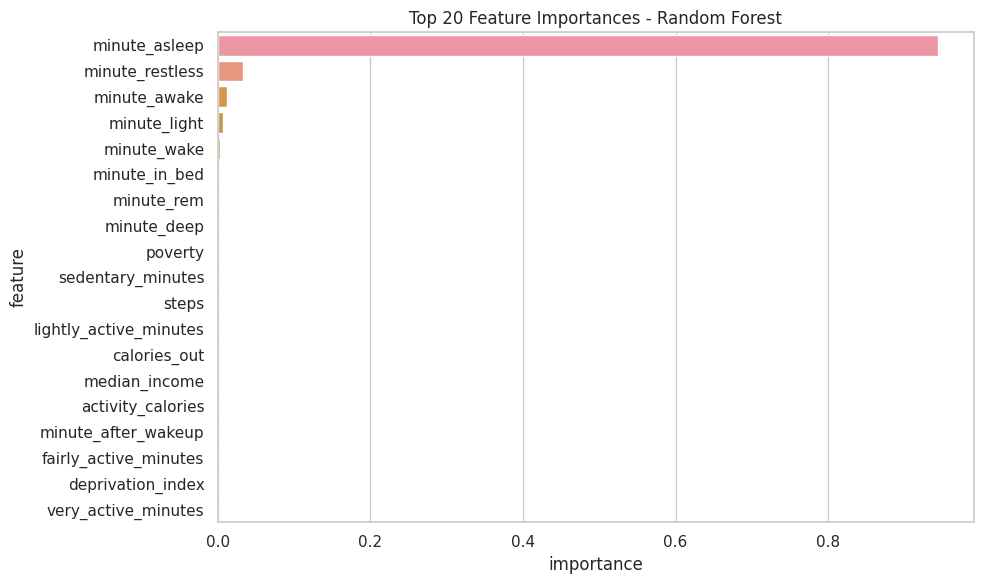

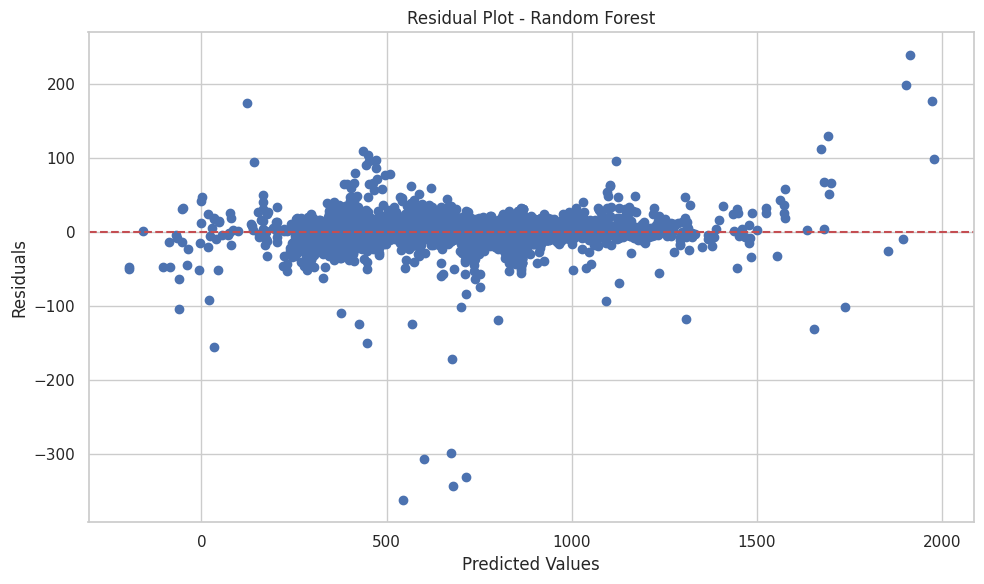

Test RMSE: 10.4023, R2: 0.9962

Training and evaluating XGBoost...
X_train shape: (96953, 19), y_train shape: (96953,)
X_val shape: (32318, 19), y_val shape: (32318,)
X_test shape: (32318, 19), y_test shape: (32318,)
Validation RMSE: 10.5940, R2: 0.9961
Cross-validation RMSE: 9.2928 (+/- 1.3804)


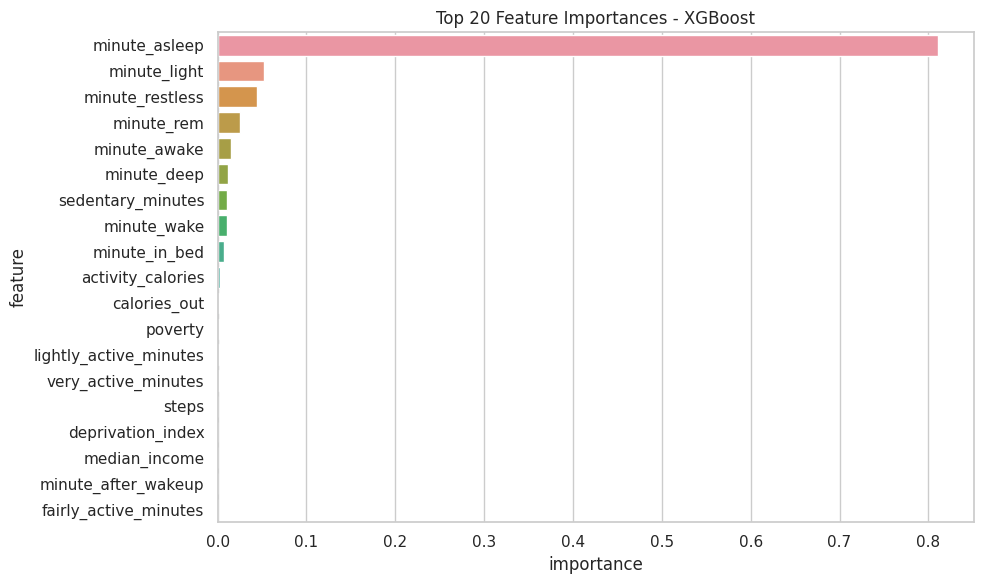

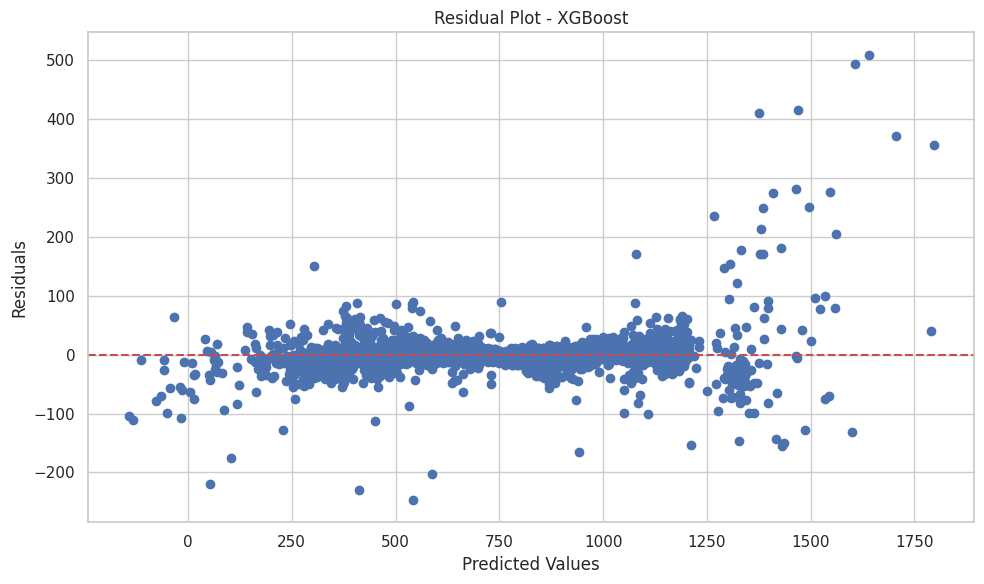

Test RMSE: 10.0252, R2: 0.9965

Training and evaluating Neural Network...
X_train shape: (96953, 19), y_train shape: (96953,)
X_val shape: (32318, 19), y_val shape: (32318,)
X_test shape: (32318, 19), y_test shape: (32318,)
1010/1010 [==============================] - 1s 933us/step
Validation RMSE: 14.5350, R2: 0.9927


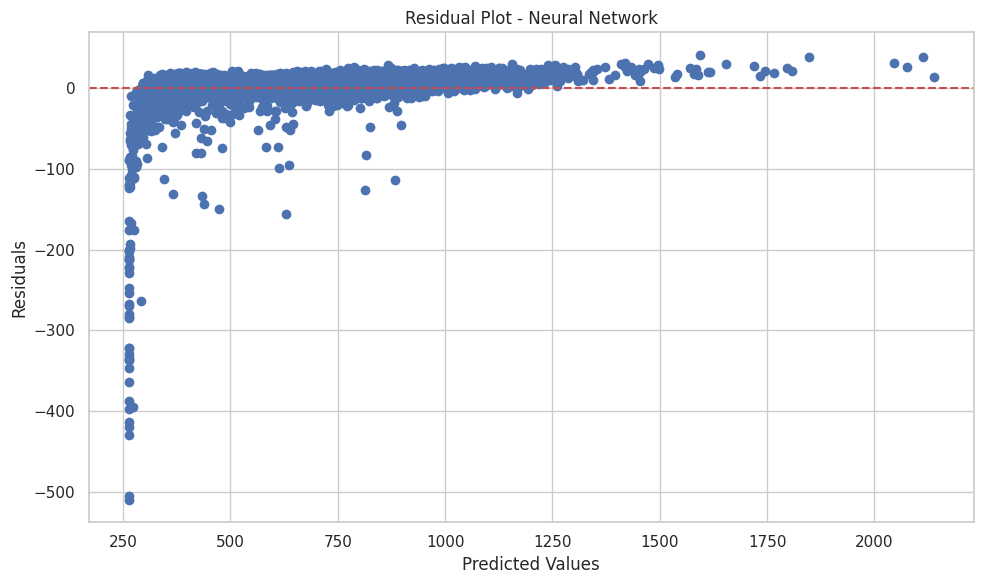

1010/1010 [==============================] - 1s 959us/step
Test RMSE: 14.1589, R2: 0.9930


In [201]:
# Run the analysis
results = train_and_evaluate_models()

In [202]:
# Compare model performances
performance_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(performance_df)


Model Performance Comparison:
                 val_rmse    val_r2  test_rmse   test_r2
Random Forest    8.357367  0.997590  10.402323  0.996218
XGBoost         10.593961  0.996127  10.025234  0.996487
Neural Network  14.535049  0.992710  14.158941  0.992994


<Figure size 1200x600 with 0 Axes>

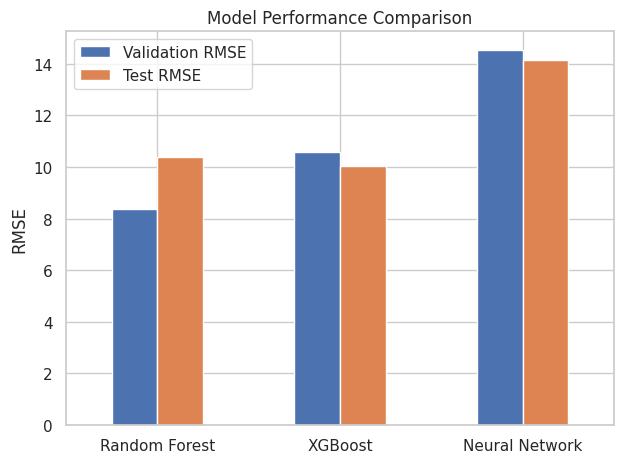

In [203]:
# Visualize model comparison
plt.figure(figsize=(12, 6))
performance_df[['val_rmse', 'test_rmse']].plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('RMSE')
plt.xticks(rotation=0)
plt.legend(['Validation RMSE', 'Test RMSE'])
plt.tight_layout()
plt.show()

# ------------------------------

# Mode; -5

In [208]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import xgboost as xgb

In [207]:
ml_model_5 = df_sample.copy()

In [209]:
ml_model_5.drop(columns=['gender','sleep_date','date','is_main_sleep','race','ethnicity','sex_at_birth','zip_code','sleep_quality_score_1','sleep_quality_score_3'], inplace=True)

In [222]:
ml_model_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161589 entries, 1122531 to 370910
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   activity_calories       161589 non-null  int64
 1   calories_out            161589 non-null  int64
 2   fairly_active_minutes   161589 non-null  int64
 3   lightly_active_minutes  161589 non-null  int64
 4   sedentary_minutes       161589 non-null  int64
 5   steps                   161589 non-null  Int64
 6   very_active_minutes     161589 non-null  int64
 7   minute_in_bed           161589 non-null  Int64
 8   minute_asleep           161589 non-null  Int64
 9   minute_after_wakeup     161589 non-null  Int64
 10  minute_awake            161589 non-null  Int64
 11  minute_restless         161589 non-null  int64
 12  minute_deep             161589 non-null  int64
 13  minute_light            161589 non-null  int64
 14  minute_rem              161589 non-null  int64
 15 

In [213]:
columns_to_convert = [
    'activity_calories', 'calories_out', 'fairly_active_minutes', 
    'lightly_active_minutes', 'sedentary_minutes', 'very_active_minutes', 
    'minute_restless', 'minute_deep', 'minute_light', 'minute_rem', 
    'minute_wake', 'median_income', 'poverty', 'deprivation_index'
]

# Convert the specified columns to integers
ml_model_5[columns_to_convert] = ml_model_5[columns_to_convert].fillna(0).astype(int)

In [218]:
columns_to_convert = [
    'total_sleep_time', 'deep_sleep_percentage', 'light_sleep_percentage',
    'rem_sleep_percentage', 'calories_per_step'
]

# Convert the specified columns to integers
ml_model_5[columns_to_convert] = ml_model_5[columns_to_convert].fillna(0).astype(int)

In [221]:
ml_model_5 = ml_model_5.drop(['sleep_disturbance_ratio', 'activity_to_sedentary_ratio'], axis=1)

In [223]:
# Compute the correlation matrix
corr_matrix = ml_model_5.corr()

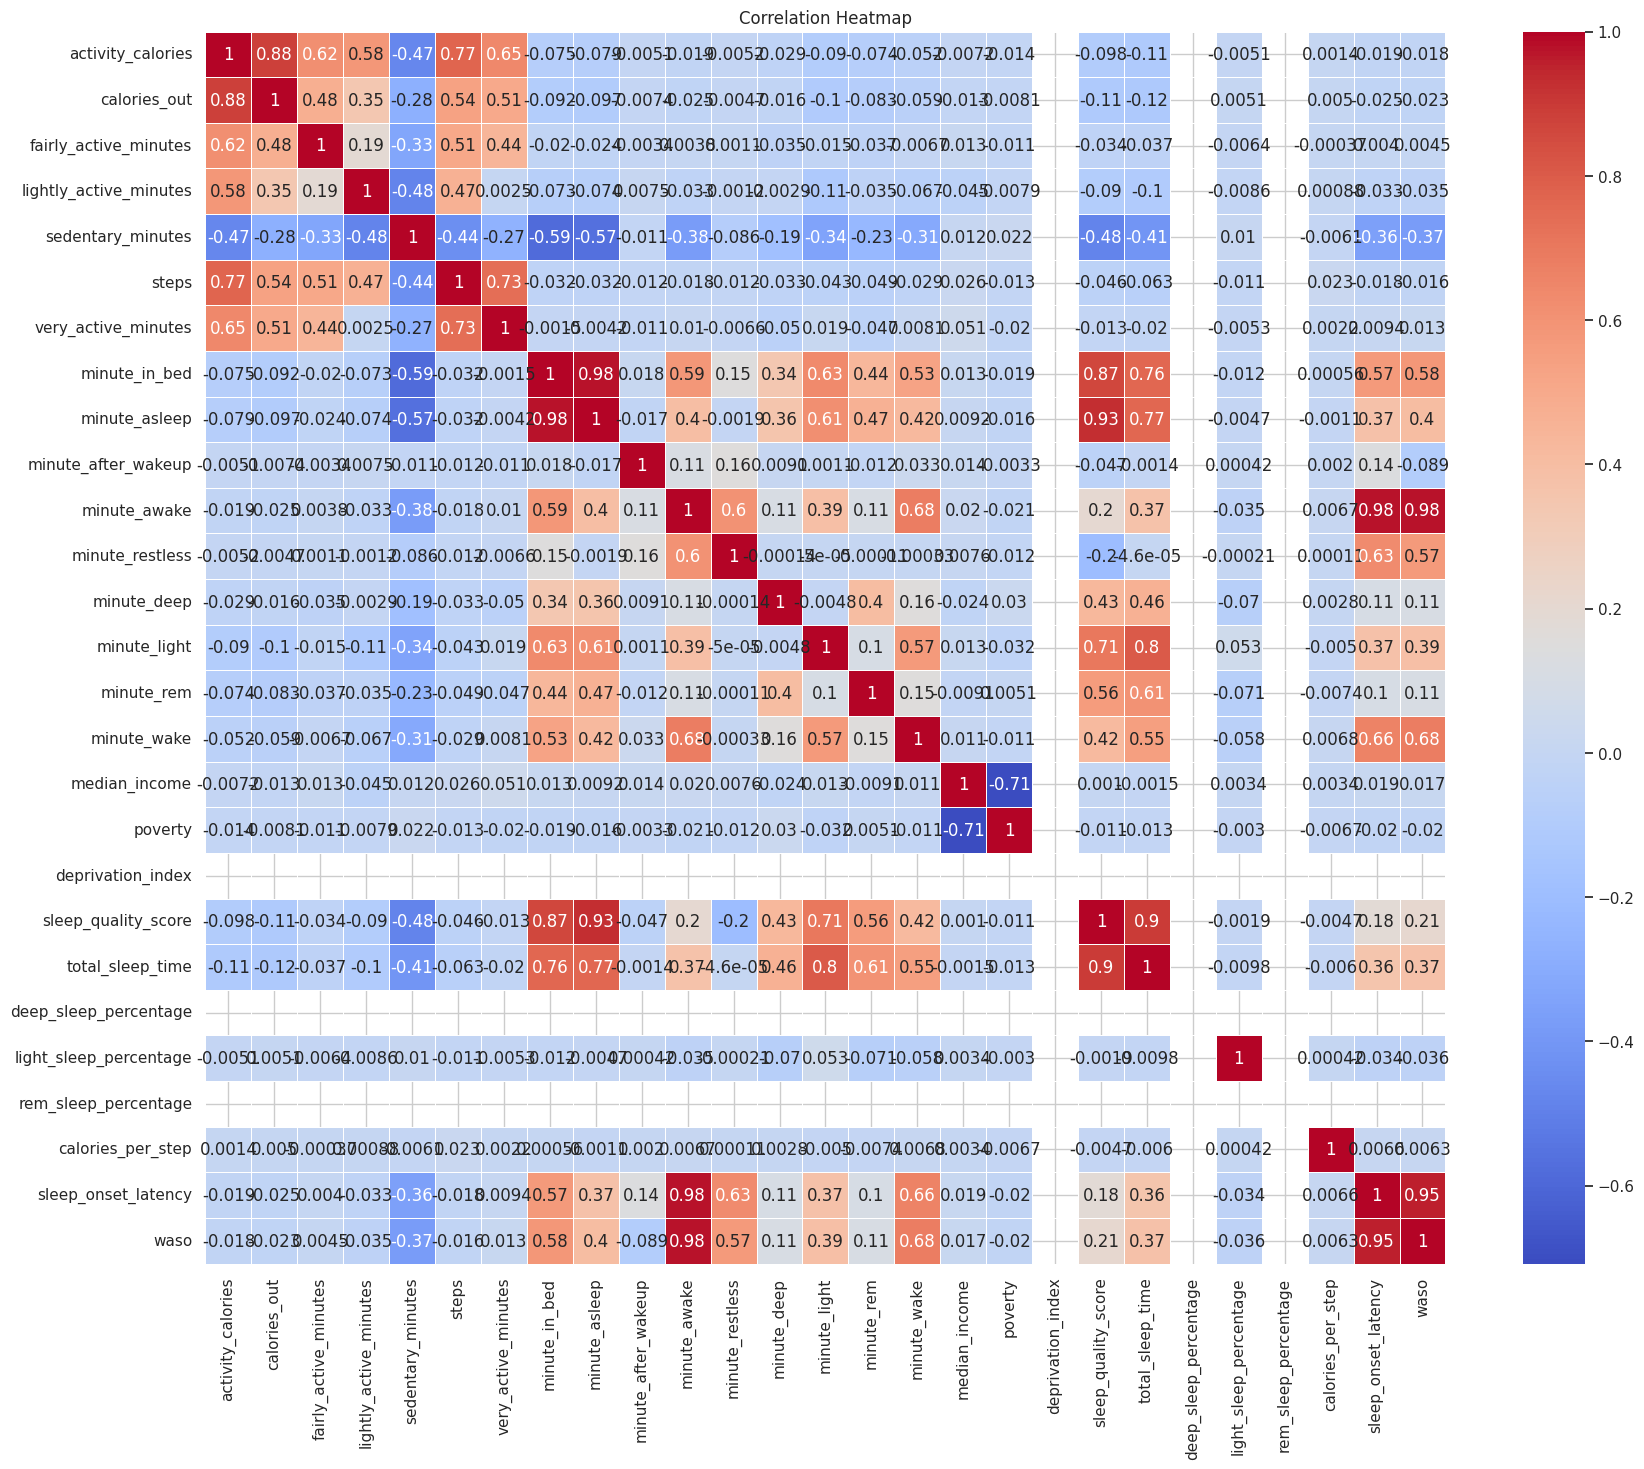

In [224]:
# Plot a heatmap
plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [225]:
# Find highly correlated features
threshold = 0.8
high_corr_features = np.where(np.abs(corr_matrix) > threshold)
high_corr_features = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_features) if x != y and x < y]

print("Highly correlated feature pairs:")
for feat1, feat2 in high_corr_features:
    print(f"{feat1} and {feat2}: {corr_matrix.loc[feat1, feat2]:.2f}")

Highly correlated feature pairs:
activity_calories and calories_out: 0.88
minute_in_bed and minute_asleep: 0.98
minute_in_bed and sleep_quality_score: 0.87
minute_asleep and sleep_quality_score: 0.93
minute_awake and sleep_onset_latency: 0.98
minute_awake and waso: 0.98
minute_light and total_sleep_time: 0.80
sleep_quality_score and total_sleep_time: 0.90
sleep_onset_latency and waso: 0.95


In [226]:
X = ml_model_5.drop('sleep_quality_score', axis=1)
y = ml_model_5['sleep_quality_score']

In [227]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestRegressor(random_state=42)

In [228]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

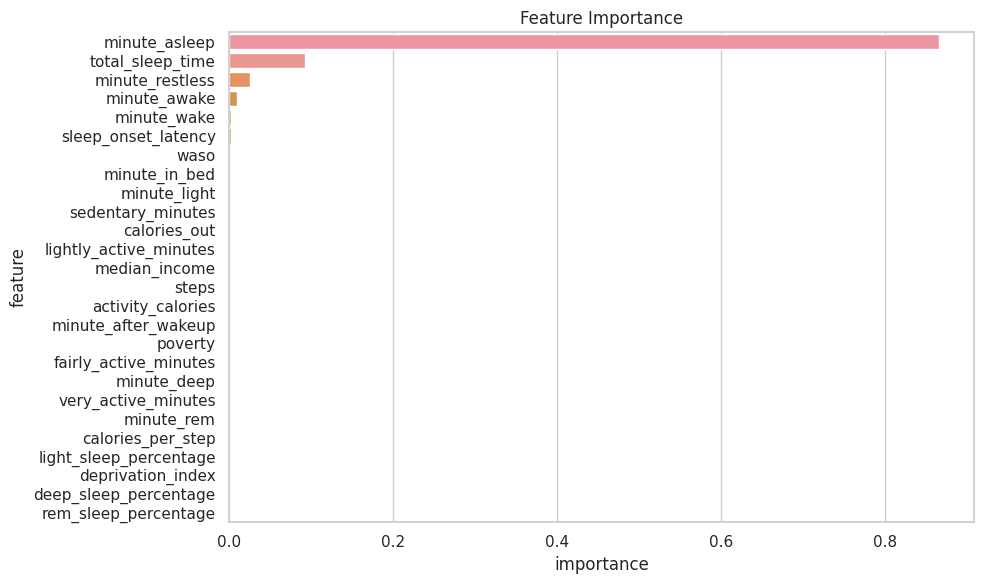

Top 15 important features:
                   feature  importance
8            minute_asleep    0.865498
19        total_sleep_time    0.092778
11         minute_restless    0.026094
10            minute_awake    0.009285
15             minute_wake    0.002929
24     sleep_onset_latency    0.002545
25                    waso    0.000456
7            minute_in_bed    0.000160
13            minute_light    0.000060
4        sedentary_minutes    0.000024
1             calories_out    0.000022
3   lightly_active_minutes    0.000022
16           median_income    0.000019
5                    steps    0.000018
0        activity_calories    0.000018


In [231]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

print("Top 15 important features:")
print(feature_importance.head(15))

In [236]:
ml_model_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161589 entries, 1122531 to 370910
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   activity_calories       161589 non-null  int64
 1   fairly_active_minutes   161589 non-null  int64
 2   lightly_active_minutes  161589 non-null  int64
 3   sedentary_minutes       161589 non-null  int64
 4   very_active_minutes     161589 non-null  int64
 5   minute_asleep           161589 non-null  Int64
 6   minute_awake            161589 non-null  Int64
 7   minute_restless         161589 non-null  int64
 8   minute_deep             161589 non-null  int64
 9   minute_light            161589 non-null  int64
 10  minute_rem              161589 non-null  int64
 11  minute_wake             161589 non-null  int64
 12  sleep_quality_score     161589 non-null  int64
 13  total_sleep_time        161589 non-null  int64
 14  waso                    161589 non-null  Int64
dtyp

In [233]:
ml_model_5.drop(columns=['calories_per_step','deep_sleep_percentage','light_sleep_percentage','rem_sleep_percentage','steps','median_income','poverty','calories_out','minute_in_bed','sleep_onset_latency','minute_after_wakeup'], inplace=True)

In [235]:
ml_model_5.drop(columns=['deprivation_index'], inplace=True)

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Assuming your dataframe is called 'df'
columns_to_check = ['activity_calories', 'fairly_active_minutes', 'lightly_active_minutes', 
                    'sedentary_minutes', 'very_active_minutes', 'minute_asleep', 'minute_awake', 
                    'minute_restless', 'minute_deep', 'minute_light', 'minute_rem', 'minute_wake', 
                    'sleep_quality_score', 'total_sleep_time', 'waso']

for column in columns_to_check:
    outliers = find_outliers_iqr(ml_model_5, column)
    print(f"Outliers in {column}: {len(outliers)}")

Outliers in activity_calories: 4989
Outliers in fairly_active_minutes: 10600
Outliers in lightly_active_minutes: 2687
Outliers in sedentary_minutes: 6323
Outliers in very_active_minutes: 8089
Outliers in minute_asleep: 8841
Outliers in minute_awake: 3256
Outliers in minute_restless: 23813
Outliers in minute_deep: 3681
Outliers in minute_light: 5841
Outliers in minute_rem: 3274
Outliers in minute_wake: 5252
Outliers in sleep_quality_score: 3837
Outliers in total_sleep_time: 10041
Outliers in waso: 3530


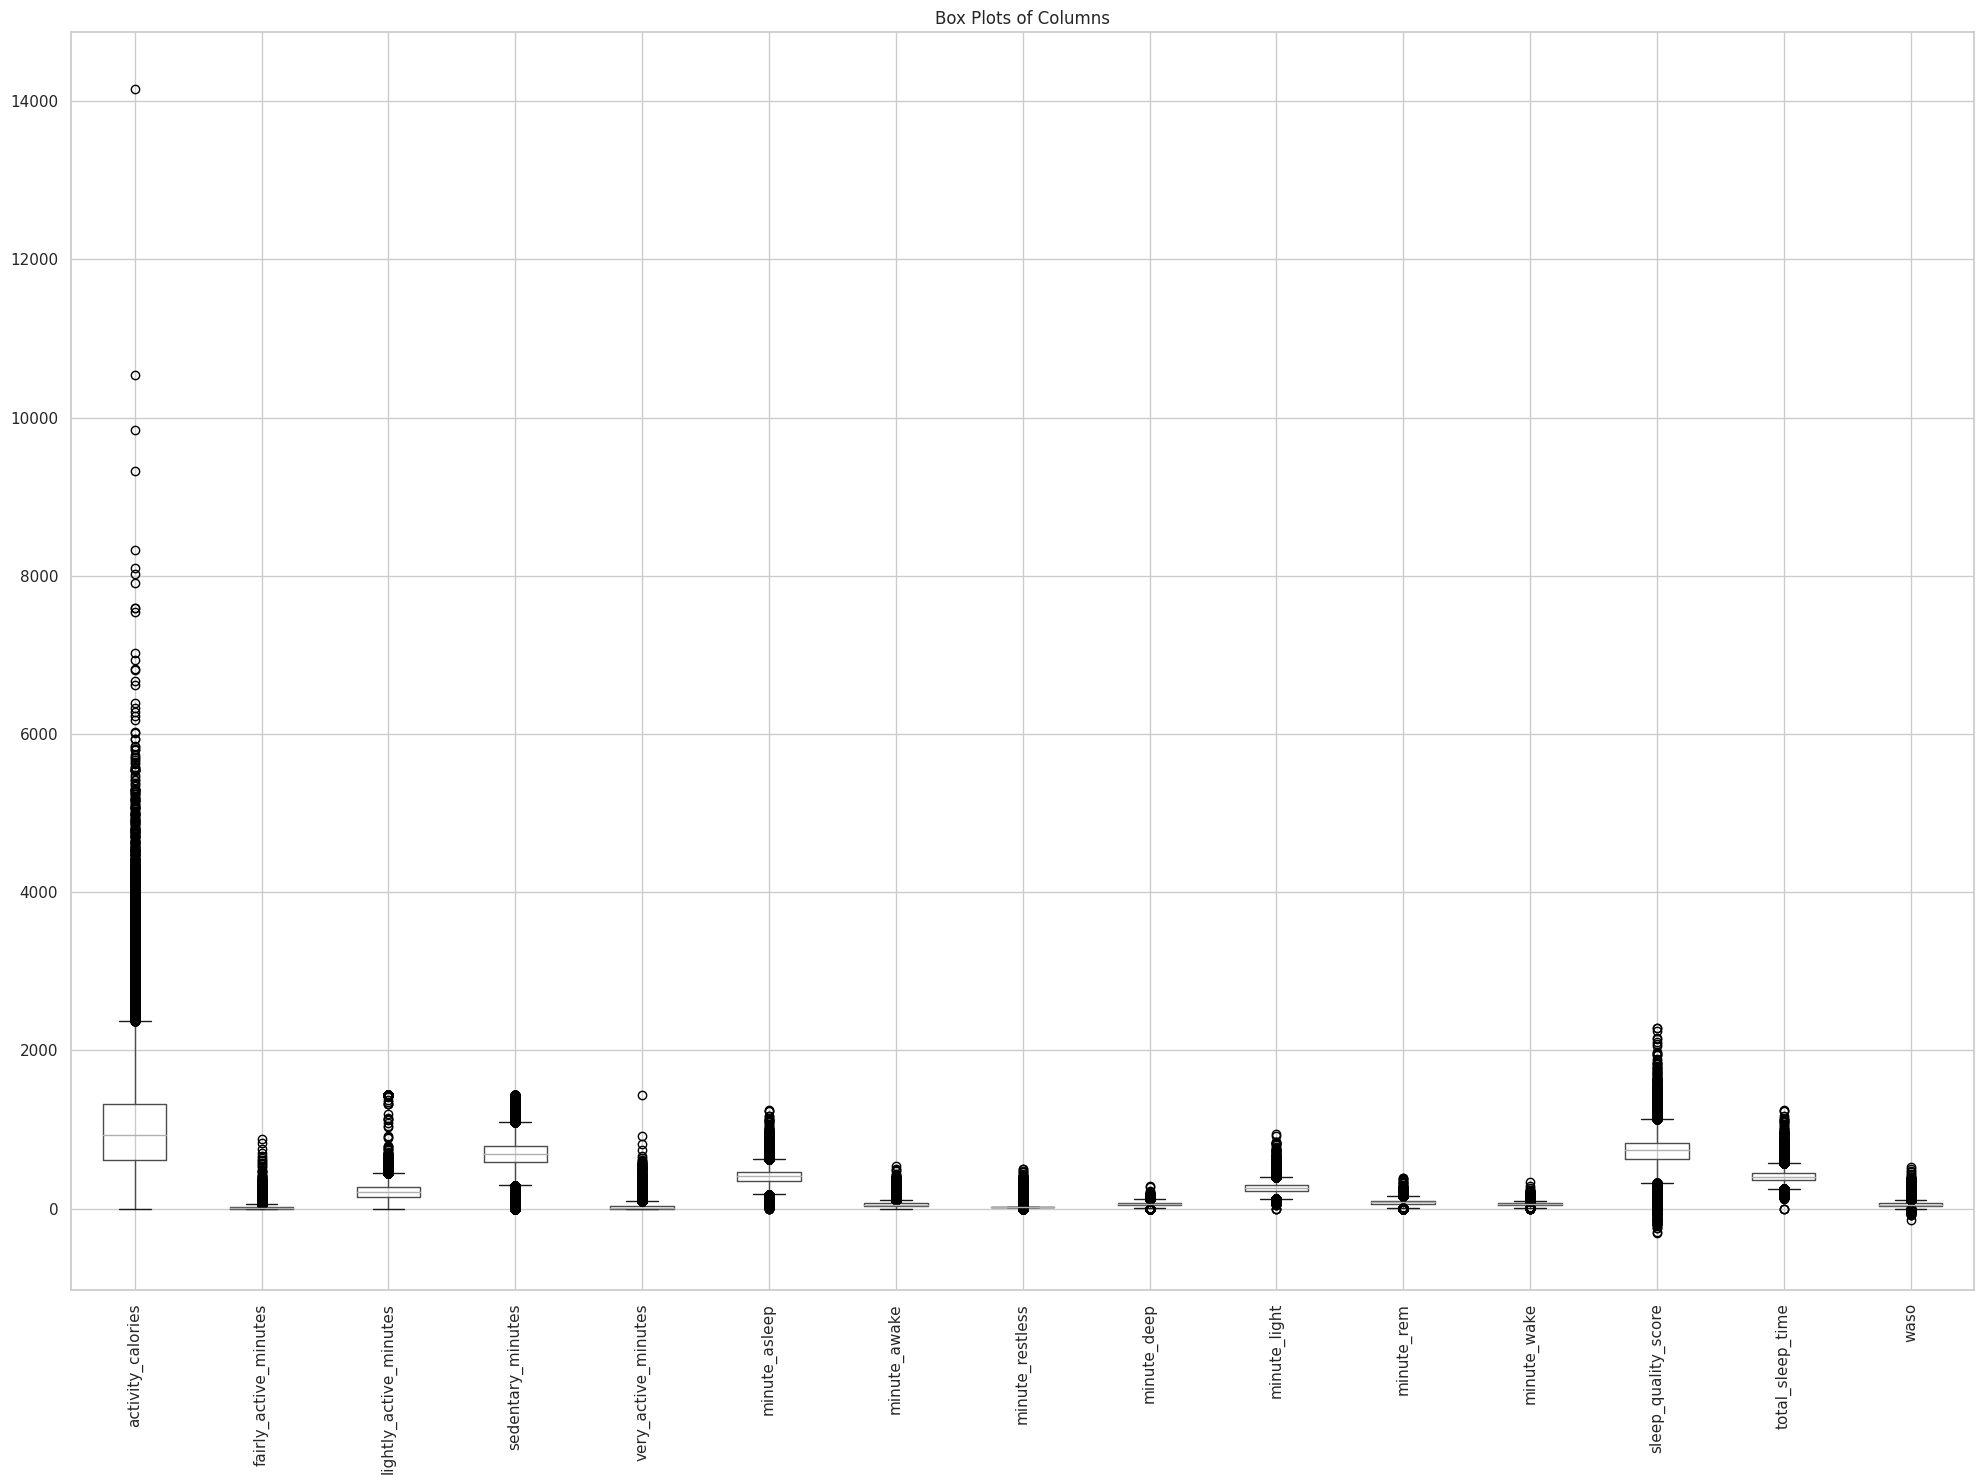

In [240]:
plt.figure(figsize=(20, 15))
ml_model_5[columns_to_check].boxplot()
plt.xticks(rotation=90)
plt.title("Box Plots of Columns")
plt.tight_layout()
plt.show()

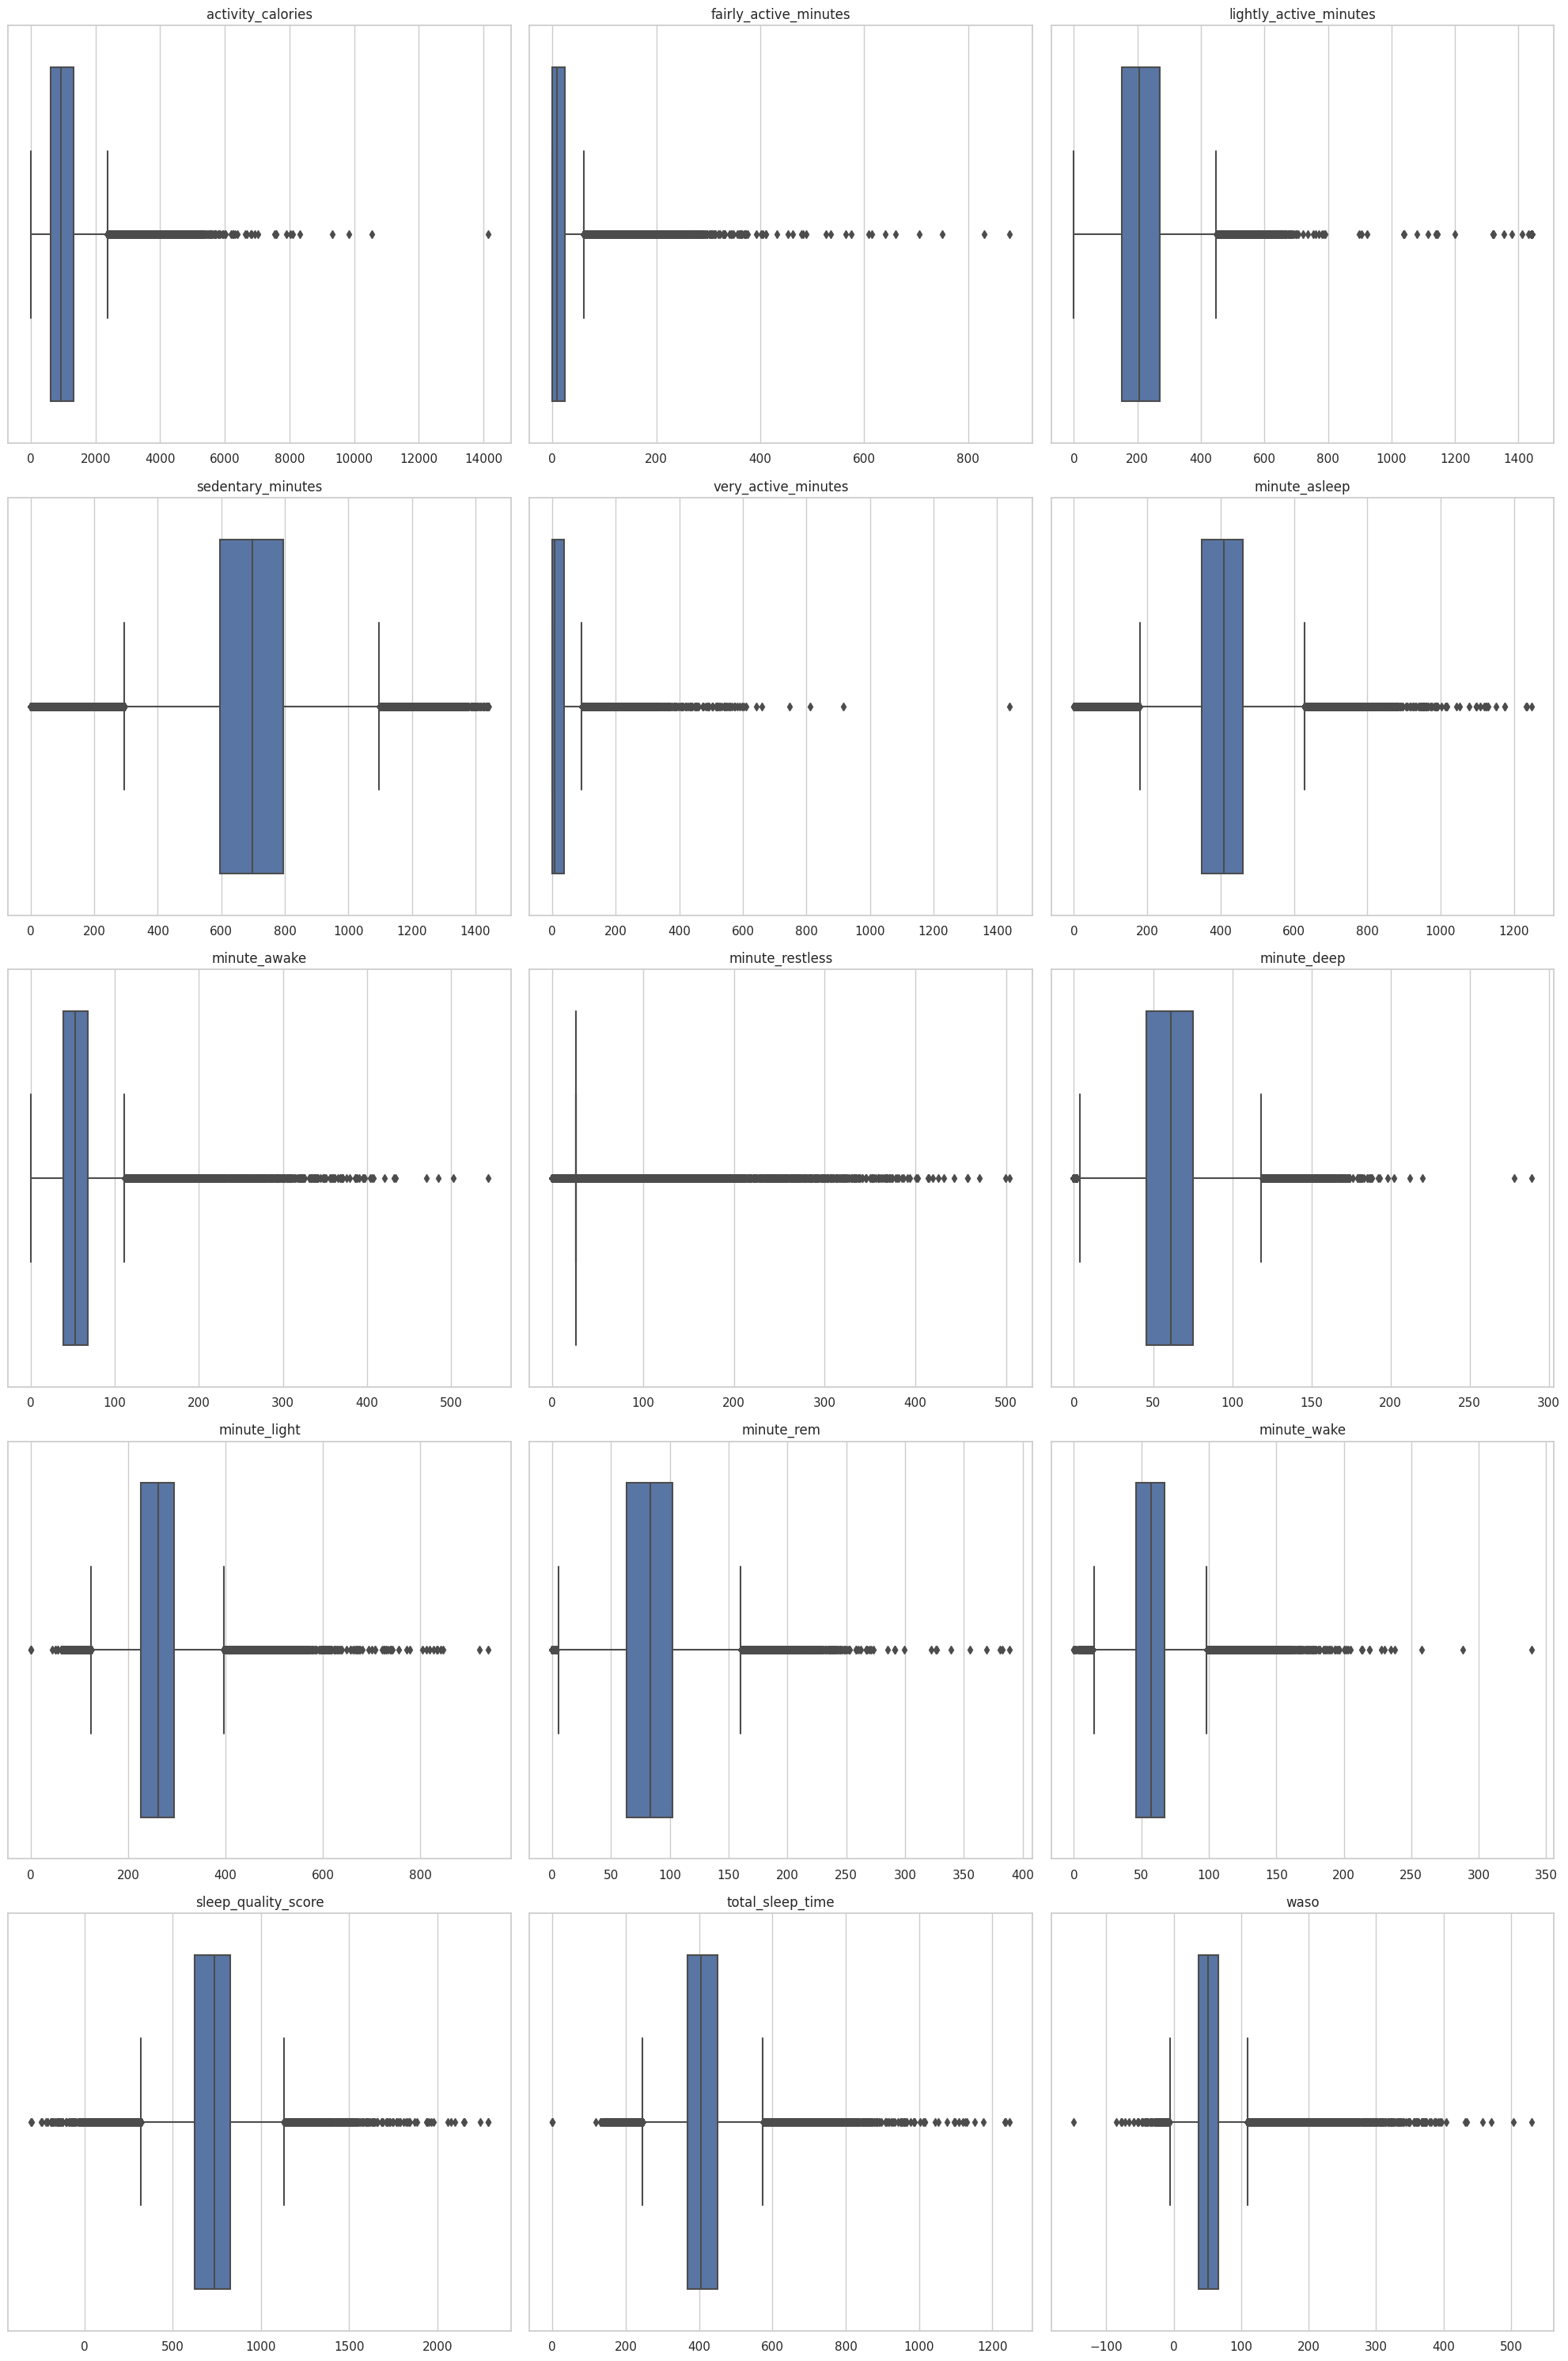

In [242]:
fig, axes = plt.subplots(5, 3, figsize=(20, 30))
axes = axes.flatten()

for i, column in enumerate(columns_to_check):
    sns.boxplot(x=ml_model_5[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

In [247]:
print(ml_model_5[columns_to_check].dtypes)

activity_calories         int64
fairly_active_minutes     int64
lightly_active_minutes    int64
sedentary_minutes         int64
very_active_minutes       int64
minute_asleep             Int64
minute_awake              Int64
minute_restless           int64
minute_deep               int64
minute_light              int64
minute_rem                int64
minute_wake               int64
sleep_quality_score       int64
total_sleep_time          int64
waso                      Int64
dtype: object


In [248]:
import numpy as np
from scipy import stats

def find_outliers_zscore(df, column, threshold=3):
    # Convert to numeric, coercing errors to NaN
    series = pd.to_numeric(df[column], errors='coerce')
    
    # Remove NaN values
    series = series.dropna()
    
    # Check if the series is empty after removing NaNs
    if series.empty:
        return pd.DataFrame()
    
    # Calculate z-scores
    z_scores = np.abs(stats.zscore(series))
    
    # Identify outliers
    outliers = df[z_scores > threshold]
    
    return outliers

# Use the function
for column in columns_to_check:
    try:
        outliers = find_outliers_zscore(ml_model_5, column)
        print(f"Outliers in {column} (Z-score method): {len(outliers)}")
    except Exception as e:
        print(f"Error processing {column}: {str(e)}")

Outliers in activity_calories (Z-score method): 2162
Outliers in fairly_active_minutes (Z-score method): 3172
Outliers in lightly_active_minutes (Z-score method): 820
Outliers in sedentary_minutes (Z-score method): 2261
Outliers in very_active_minutes (Z-score method): 2692
Error processing minute_asleep: loop of ufunc does not support argument 0 of type float which has no callable sqrt method
Error processing minute_awake: loop of ufunc does not support argument 0 of type float which has no callable sqrt method
Outliers in minute_restless (Z-score method): 1555
Outliers in minute_deep (Z-score method): 709
Outliers in minute_light (Z-score method): 1123
Outliers in minute_rem (Z-score method): 747
Outliers in minute_wake (Z-score method): 1710
Outliers in sleep_quality_score (Z-score method): 921
Outliers in total_sleep_time (Z-score method): 1164
Error processing waso: loop of ufunc does not support argument 0 of type float which has no callable sqrt method


In [249]:
ml_model_5.drop(columns=['waso','very_active_minutes'], inplace=True)

In [252]:
ml_model_5.drop(columns=['fairly_active_minutes'], inplace=True)


In [253]:
ml_model_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161589 entries, 1122531 to 370910
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   activity_calories       161589 non-null  int64
 1   lightly_active_minutes  161589 non-null  int64
 2   sedentary_minutes       161589 non-null  int64
 3   minute_asleep           161589 non-null  Int64
 4   minute_awake            161589 non-null  Int64
 5   minute_restless         161589 non-null  int64
 6   minute_deep             161589 non-null  int64
 7   minute_light            161589 non-null  int64
 8   minute_rem              161589 non-null  int64
 9   minute_wake             161589 non-null  int64
 10  sleep_quality_score     161589 non-null  int64
 11  total_sleep_time        161589 non-null  int64
dtypes: Int64(2), int64(10)
memory usage: 20.4 MB


In [254]:
X = ml_model_5.drop('sleep_quality_score', axis=1)
y = ml_model_5['sleep_quality_score']

In [255]:
# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

In [257]:
# Define numerical features for scaling
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import xgboost as xgb

num_features = X.columns
preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), num_features)
], remainder='passthrough')

In [258]:
# Define models
models = {
    'ElasticNet': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', ElasticNet(random_state=42))
    ]),
    'RandomForest': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', xgb.XGBRegressor(random_state=42, objective='reg:squarederror'))
    ])
}

In [259]:
# Define hyperparameter grids
param_grids = {
    'ElasticNet': {
        'regressor__alpha': [0.01, 0.1, 1, 10],
        'regressor__l1_ratio': [0.1, 0.5, 0.9]
    },
    'RandomForest': {
        'regressor__n_estimators': [100, 200, 300],
        'regressor__max_depth': [10, 20, None],
        'regressor__min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'regressor__n_estimators': [100, 200, 300],
        'regressor__learning_rate': [0.01, 0.05, 0.1],
        'regressor__max_depth': [3, 5, 7],
        'regressor__subsample': [0.8, 0.9, 1.0]
    }
}


In [260]:
# Function to train and evaluate models
def train_and_evaluate(name, model, param_grid):
    print(f"\nTraining {name}...")
    search = RandomizedSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, n_iter=15, random_state=42)
    search.fit(X_train, y_train)
    
    best_model = search.best_estimator_
    
    # Evaluate on the validation set
    y_val_pred = best_model.predict(X_val)
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_r2 = r2_score(y_val, y_val_pred)
    
    print(f"Best parameters: {search.best_params_}")
    print(f"Validation RMSE: {val_rmse:.4f}")
    print(f"Validation R2 Score: {val_r2:.4f}")
    
    # Test evaluation will be done later
    return {'model': best_model, 'val_rmse': val_rmse, 'val_r2': val_r2}


In [261]:
# Train and evaluate models
best_models = {}
for name, model in models.items():
    best_models[name] = train_and_evaluate(name, model, param_grids[name])


Training ElasticNet...
Best parameters: {'regressor__l1_ratio': 0.9, 'regressor__alpha': 0.01}
Validation RMSE: 0.4012
Validation R2 Score: 1.0000

Training RandomForest...
Best parameters: {'regressor__n_estimators': 100, 'regressor__min_samples_split': 2, 'regressor__max_depth': 20}
Validation RMSE: 5.8753
Validation R2 Score: 0.9988

Training XGBoost...
Best parameters: {'regressor__subsample': 0.9, 'regressor__n_estimators': 200, 'regressor__max_depth': 7, 'regressor__learning_rate': 0.05}
Validation RMSE: 10.2350
Validation R2 Score: 0.9964


In [268]:
# Define numerical features for scaling
num_features = X.columns
preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), num_features)
], remainder='passthrough')

# Define the Random Forest model pipeline
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define hyperparameter grid for Random Forest
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5, 10]
}

In [269]:
# Train and tune the model
print("\nTraining RandomForest...")
search = RandomizedSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, n_iter=15, random_state=42)
search.fit(X_train, y_train)

# Best model and predictions
best_rf_model = search.best_estimator_
y_pred = best_rf_model.predict(X_val)

# Evaluate the model
val_rmse = np.sqrt(mean_squared_error(y_val, y_pred))
val_r2 = r2_score(y_val, y_pred)
print(f"Best parameters: {search.best_params_}")
print(f"Validation RMSE: {val_rmse:.4f}")
print(f"Validation R2 Score: {val_r2:.4f}")

# Residuals calculation
residuals = y_val - y_pred


Training RandomForest...
Best parameters: {'regressor__n_estimators': 100, 'regressor__min_samples_split': 2, 'regressor__max_depth': 20}
Validation RMSE: 5.8753
Validation R2 Score: 0.9988


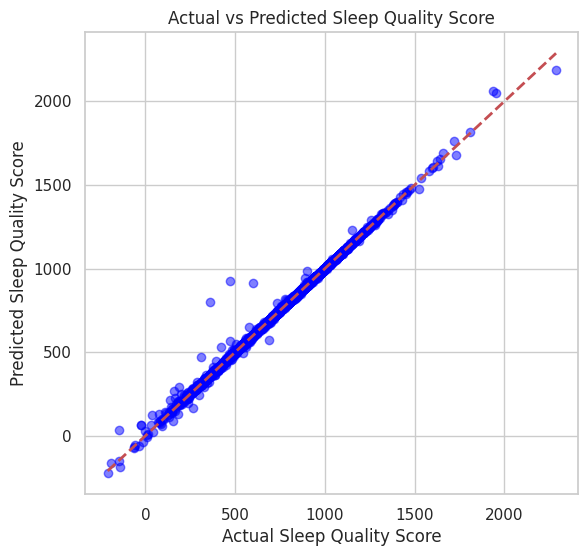

In [270]:
# Create a figure with subplots
plt.figure(figsize=(14, 6))

# Actual vs. Predicted Plot
plt.subplot(1, 2, 1)
plt.scatter(y_val, y_pred, alpha=0.5, color='blue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Sleep Quality Score')
plt.ylabel('Predicted Sleep Quality Score')
plt.title('Actual vs Predicted Sleep Quality Score')
plt.grid(True)

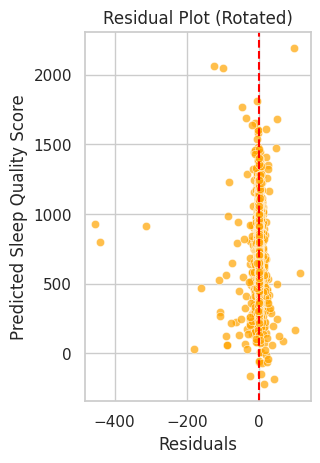

In [273]:
# Residual Plot (Rotated)
plt.subplot(1, 2, 2)
sns.scatterplot(x=residuals, y=y_pred, color='orange', alpha=0.7)
plt.axvline(0, color='red', linestyle='--')  # Vertical line at 0 for residuals
plt.ylabel('Predicted Sleep Quality Score')
plt.xlabel('Residuals')
plt.title('Residual Plot (Rotated)')
plt.grid(True)